In [1]:
import sys
sys.path.append("/home/149/ab8992/tasman-tides/")
import xarray as xr
import ttidelib as tt
import scipy
import cmocean
import os
from pathlib import Path
cmap = cmocean.cm.dense_r
import matplotlib
import matplotlib.pyplot as plt
earth_cmap = matplotlib.colormaps["gist_earth"]
from datetime import timedelta
import warnings
warnings.simplefilter("ignore")
# import filtering
import numpy as np
import dask
dask.config.set({'logging.distributed': 'error'})
from dask.distributed import Client,default_client
import xrft
import matplotlib.gridspec as gridspec

client = tt.startdask(nthreads=1,n_workers = 52)

client

<Client: 'tcp://127.0.0.1:39753' processes=52 threads=52, memory=416.00 GiB>


<Client: 'tcp://127.0.0.1:39753' processes=52 threads=52, memory=416.00 GiB>

# Re load all data


In [27]:

data = {}
for expt in ["full-10","beamless-10","beamless-20","full-20","full-40","beamless-40","full-80","beamless-80","smooth-10","smooth-20","smooth-40"]:
    path = Path(f"/g/data/nm03/ab8992/postprocessed/figdata/energies/") / expt
    bathy = xr.open_dataset(f"/g/data/nm03/ab8992/outputs/{expt}/bathy_transect.nc")
    times = os.listdir(path)
    times = np.sort(np.array([int(i.split("t0-")[1]) for i in times]))

    data[expt] = None
    for i in range(len(times)):
        try:
            if "80" in expt:
                newdata = xr.merge(
                            [
                                xr.open_dataset(path / f"t0-{times[i]}" / "KE.nc",decode_times= False,decode_cf = False).KE.rename("KE"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam.nc",decode_times= False,decode_cf = False).EF.rename("EF_alongbeam").mean("time"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam.nc",decode_times= False,decode_cf = False).EF.rename("EF_acrossbeam").mean("time"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam_forward.nc",decode_times= False,decode_cf = False).EF_alongbeam_forward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam_forward.nc",decode_times= False,decode_cf = False).EF_acrossbeam_forward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam_backward.nc",decode_times= False,decode_cf = False).EF_alongbeam_backward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam_backward.nc",decode_times= False,decode_cf = False).EF_acrossbeam_backward,
                                bathy.rename({"depth":"bathy"}) * -1
                            ]
                        ).expand_dims({"time":[float(times[i])]})
            else:
                newdata = xr.merge(
                            [
                                (
                                    xr.open_dataset(path / f"t0-{times[i]}" / "KE_forward.nc",decode_times= False,decode_cf = False).KE_forward +
                                    xr.open_dataset(path / f"t0-{times[i]}" / "KE_backward.nc",decode_times= False,decode_cf = False).KE_backward +
                                    xr.open_dataset(path / f"t0-{times[i]}" / "KE_cross.nc",decode_times= False,decode_cf = False).KE_cross
                                    ).rename("KE"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam.nc",decode_times= False,decode_cf = False).EF.rename("EF_alongbeam").mean("time"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam.nc",decode_times= False,decode_cf = False).EF.rename("EF_acrossbeam").mean("time"),
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam_forward.nc",decode_times= False,decode_cf = False).EF_alongbeam_forward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam_forward.nc",decode_times= False,decode_cf = False).EF_acrossbeam_forward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_alongbeam_backward.nc",decode_times= False,decode_cf = False).EF_alongbeam_backward,
                                xr.open_dataset(path / f"t0-{times[i]}" / "EF_acrossbeam_backward.nc",decode_times= False,decode_cf = False).EF_acrossbeam_backward,
                                bathy.rename({"depth":"bathy"}) * -1
                            ]
                        ).expand_dims({"time":[float(times[i])]})
            if data[expt] is None:
                data[expt] = newdata
            else:
                data[expt] = xr.concat(
                    [
                        data[expt],
                        newdata
                    ],
                    dim = "time"
                )
        except Exception as e:
            print(f"Error processing time {times[i]} for experiment {expt}: {e}")

    # data[expt] = data[expt].mean("time")

## POINT IN KLYMAK CORRESPONDS TO:
xb,yb = 224,68

Error processing time 3960 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-3960/KE_forward.nc'
Error processing time 4680 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-4680/KE_forward.nc'
Error processing time 5400 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-5400/KE_forward.nc'
Error processing time 6120 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-6120/KE_forward.nc'
Error processing time 7560 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-40/t0-7560/KE_forward.nc'
Error processing time 8280 for experiment full-40: [Errno 2] No such file or directory: '/g/data/nm03/ab8992/postprocessed/figdata/energies/full-

## Save time averaged data

In [ ]:
for expt in data:
    data[expt] = xr.merge(
        [
            data[expt].mean("time"),
            data[expt].EF_alongbeam
        ]
    )
    data[expt].to_netcdf(f"/g/data/nm03/ab8992/postprocessed/figdata/averaged/{expt}",mode="w")

## Load the time averaged data

In [36]:
data = {}
for expt in ["full-10","beamless-10","beamless-20","full-20","full-40","beamless-40","full-80","beamless-80","smooth-10","smooth-20","smooth-40"]:
    path = Path(f"/g/data/nm03/ab8992/postprocessed/figdata/averaged/") / expt
    data[expt] = xr.open_dataset(path)


## Common to all figures

In [5]:

import matplotlib.gridspec as gridspec

def plot_velocity_quiver(expt,ax,mode = 0,xlim = slice(None,None),ylim = slice(None,None),scale = 3000,umax = 1,t0_u = 50,width = 0.002):
    # expt = "full-20"
    alongbeam = data[expt].EF_alongbeam
    acrossbeam = data[expt].EF_acrossbeam
    u = xr.open_mfdataset(f"/g/data/nm03/ab8992/postprocessed/figdata/snapshots/{expt}/u_*.nc").u.isel(mode = mode)
    t0 = 22000
    if "40" in expt:
        t0 = 4216
    if "80" in expt:
        t0 = 12258

    # vmode = xr.open_dataset(f"/g/data/nm03/ab8992/postprocessed/{expt}/vertical_eigenfunctions/vmode-t0-{t0}.nc").U
    vmode = xr.open_dataset(f"/g/data/nm03/ab8992/postprocessed/full-40/vertical_eigenfunctions/vmode-t0-4216.nc").U
    u *= vmode.interp_like(u.isel(time = 0)).isel(mode = mode).sel(zl = 50,method = "nearest")

    alongbeam = alongbeam.sel(xb = xlim,yb = ylim).isel(mode = mode)
    acrossbeam = acrossbeam.sel(xb = xlim,yb = ylim).isel(mode = mode)

    if "mode" in alongbeam.dims:
        alongbeam = alongbeam.sum("mode")
        acrossbeam = acrossbeam.sum("mode")
    if "mode" in u.dims:
        u = u.sum("mode")

    # np.sqrt(acrossbeam**2 + alongbeam**2).sum("mode").plot(ax = ax)
    yspacing = 5
    xspacing = 5
    if "20" in expt:
        yspacing,xspacing = yspacing * 2, xspacing * 2
    elif "40" in expt:
        yspacing,xspacing = yspacing * 4, xspacing * 4
    elif "80" in expt:
        yspacing,xspacing = yspacing * 8, xspacing * 8
    _yb = acrossbeam.yb[::yspacing]
    _xb = acrossbeam.xb[::xspacing]
    _along = (alongbeam )[::yspacing,::xspacing]
    _across = (acrossbeam)[::yspacing,::xspacing]

    # print(expt,np.mean(magnitude.sel(xb = slice(100,175)).values),sep = "\t")
    t0 = t0_u
    if "40" in expt:
        t0 -= 1 ## Correct phase for 40th so the y line up 
    elif "80" in expt:
        t0 -= 32 ## back 5 from 20 
    u.isel(time = t0).plot(ax = ax,cmap ="RdBu",add_colorbar = False,vmax = umax,vmin = -1 * umax)
    # print(magnitude)
    ax.quiver(_xb, _yb, _along, _across, color="black", scale=scale,scale_units = "width",width = width)
    tt.plot_topo(ax,xr.open_dataset(f"/g/data/nm03/ab8992/outputs/{expt}/bathy_transect.nc").depth * -1)

    # ax.set_ylim(-120,120)
    ax.set_xlim(0,None)
    ax.set_xlabel("")
    ax.set_ylabel("")

def plot_KE_quiver(alongbeam,acrossbeam,ax,xlim = slice(0,600),ylim = slice(-130,130),arrow_scale = 3000,mag_scale = 3000,mod_scale = 1,xs = [[90, 220]], ys = [ [120, -120]],signs = [1],spacing = 2):
    # expt = "full-20"
    arrow_scale *= mod_scale
    mag_scale *= mod_scale
    alongbeam = alongbeam.sel(xb = xlim,yb = ylim)
    acrossbeam = acrossbeam.sel(xb = xlim,yb = ylim)


    if "mode" in alongbeam.dims:
        alongbeam = alongbeam.sum("mode")
        acrossbeam = acrossbeam.sum("mode")

    energy = 0
    length = 0
    for x,y,s in zip(xs,ys,signs):

        integral = contour_integral(x,y,alongbeam,acrossbeam)
        # print(1e-6 * s * integral.energy.values)
        energy += s * integral.energy.values
        length += integral.length.values
    # print()
    total = energy *1e-3

    _yb = acrossbeam.yb[::spacing]
    _xb = acrossbeam.xb[::spacing]
    _along = (alongbeam )[::spacing,::spacing]
    _across = (acrossbeam)[::spacing,::spacing]

    # print(magnitude)
    mag = np.sqrt(alongbeam**2 + acrossbeam**2)
    mag.plot(ax = ax,add_colorbar = False,cmap = cmocean.cm.deep_r,vmax = mag_scale)

    ax.quiver(_xb, _yb, _along, _across, color="red", scale=arrow_scale,scale_units = "width",width = 0.004)
    tt.plot_topo(ax,xr.open_dataset(f"/g/data/nm03/ab8992/outputs/{expt}/bathy_transect.nc").depth * -1)

    ax.set_ylim(-120,120)
    ax.set_xlim(0,1200)
    ax.set_xlabel("")
    ax.set_ylabel("")

    ## Add patch and print the total integrated flux on it
    patch = ax.add_patch(matplotlib.patches.Rectangle((280, 80), 100, 40, color='black', alpha=0.2))
    
    ax.annotate(
        f"{total:.0f} MW",
        xy=(330, 100),  # Position of the text
        xycoords='data',  # Use data coordinates
        fontsize=22,
        color="white",
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
    )

def contour_mask_singleline(xs,ys,data):
    """
    Returns umask,vmask
    """
    dx = (data.yb[2] - data.yb[1]).values
    if xs[0] == xs[1]: # HANDLE VERTICAL LINE
        return xr.where(
            (np.abs(data.xb + 1e-9 - xs[0]) < dx/2) *
            (data.yb > ys[0]) * 
            (data.yb < ys[1])            
            ,1,0
        ).fillna(0), (data * 0).astype(int)
    if ys[0] == ys[1]: # HANDLE HORIZONTAL LINE
        return data * 0,xr.where(
            (np.abs(data.yb + 1e-9 - ys[0]) < dx/2) *
            (data.xb > xs[0]) * 
            (data.xb < xs[1])
            ,1,0
        ).fillna(0)
    
    ## Deal with an angled line
    m = (ys[1] - ys[0]) / (xs[1] - xs[0])
    c = ys[0] - m * xs[0]

    ## V mask first. So, we need unique points in x
    x_points = np.arange(xs[0],xs[1],dx)
    y_points = m * x_points + c
    # y_points = np.round(y_points,1)
    x_points = np.round(x_points,0)
    vmask = xr.where(
        (np.abs(data.xb - x_points[0]- 1e-5)  <= dx/2) *
        (np.abs(data.yb - y_points[0]- 1e-5)  <= dx/2)
        ,1,0
        )
    for i in range(1,len(x_points)):
        vmask += xr.where(
            (np.abs(data.xb - x_points[i] - 1e-5)  <= dx/2) *
            (np.abs(data.yb - y_points[i] - 1e-5)  <= dx/2)
            ,1,0
            )
    ## U mask second. So, we need unique points in y
    y_points = np.arange(np.min(ys),np.max(ys),dx)
    x_points = (y_points - c) / m
    umask = xr.where(
        (np.abs(data.xb - x_points[0]- 1e-5)  <= dx/2) *
        (np.abs(data.yb - y_points[0]- 1e-5)  <= dx/2)
        ,1,0
        )
    for i in range(1,len(x_points)):
        umask += xr.where(
            (np.abs(data.xb - x_points[i] - 1e-5)  <= dx/2) *
            (np.abs(data.yb - y_points[i] - 1e-5)  <= dx/2)
            ,1,0
            )

    return umask.astype(int),vmask.astype(int)

def contour_mask_compound(xs,ys,data):
    umask,vmask = contour_mask_singleline(xs[0],ys[0],data)

    length = np.sqrt((xs[0][1] - xs[0][0])**2 + (ys[0][1] - ys[0][0])**2) * 1000
    for i in range(1,len(xs)):
        u,v = contour_mask_singleline(xs[i],ys[i],data)
        umask += u 
        vmask += v 
        length += np.sqrt((xs[i][1] - xs[i][0])**2 + (ys[i][1] - ys[i][0])**2) * 1000

    return xr.merge(
        [xr.where(umask == 0,0,1).rename("umask") , xr.where(vmask == 0,0,1).rename("vmask"),xr.DataArray(length).rename("length")])

def contour_integral(xs,ys,alongbeam,acrossbeam):
    """
    Pass x and y coords of straight line. Need to pre-multiply data to get orientation to line 
    correct as function just integrates along the line. If line is parallel to an axis, just 
    pre multiply alongbeam or acrossbeam by 0 to ensure that we don't integrate over empty dimension.
    """
    if type(xs[0]) == list:
        mask = contour_mask_compound(xs,ys,alongbeam)
        umask = mask["umask"]
        vmask = mask["vmask"]
        length = mask["length"]

    else:
        umask,vmask = contour_mask_singleline(xs,ys,alongbeam)
        # print("Ulength:",umask.sum("xb").sum("yb").values)
        # print("Vlength:",vmask.sum("xb").sum("yb").values)
        length = np.sqrt((xs[1] - xs[0])**2 + (ys[1] - ys[0])**2) * 1000

    out = (umask * alongbeam).sum("xb").integrate("yb")
    out += (vmask * acrossbeam).sum("yb").integrate("xb")
    out = xr.Dataset({"energy":out,"length":length})
    out["energy"].attrs["Units"] = "kW"
    out["energy"].attrs["length"] = "m"
    return out # Convert km -> m

font = {'family' : 'serif',
        'weight':'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

smallfont = {'family' : 'serif',
        'weight':'normal',
        'size'   : 18}

lineplot_colours = ['#be2573','#2596be','#ff8800',"#00bf7c"]
contours = [-3000,-2000,-1000]

# Fig2: Compare modes in shapsnot

Text(1165, -140, '80 km')

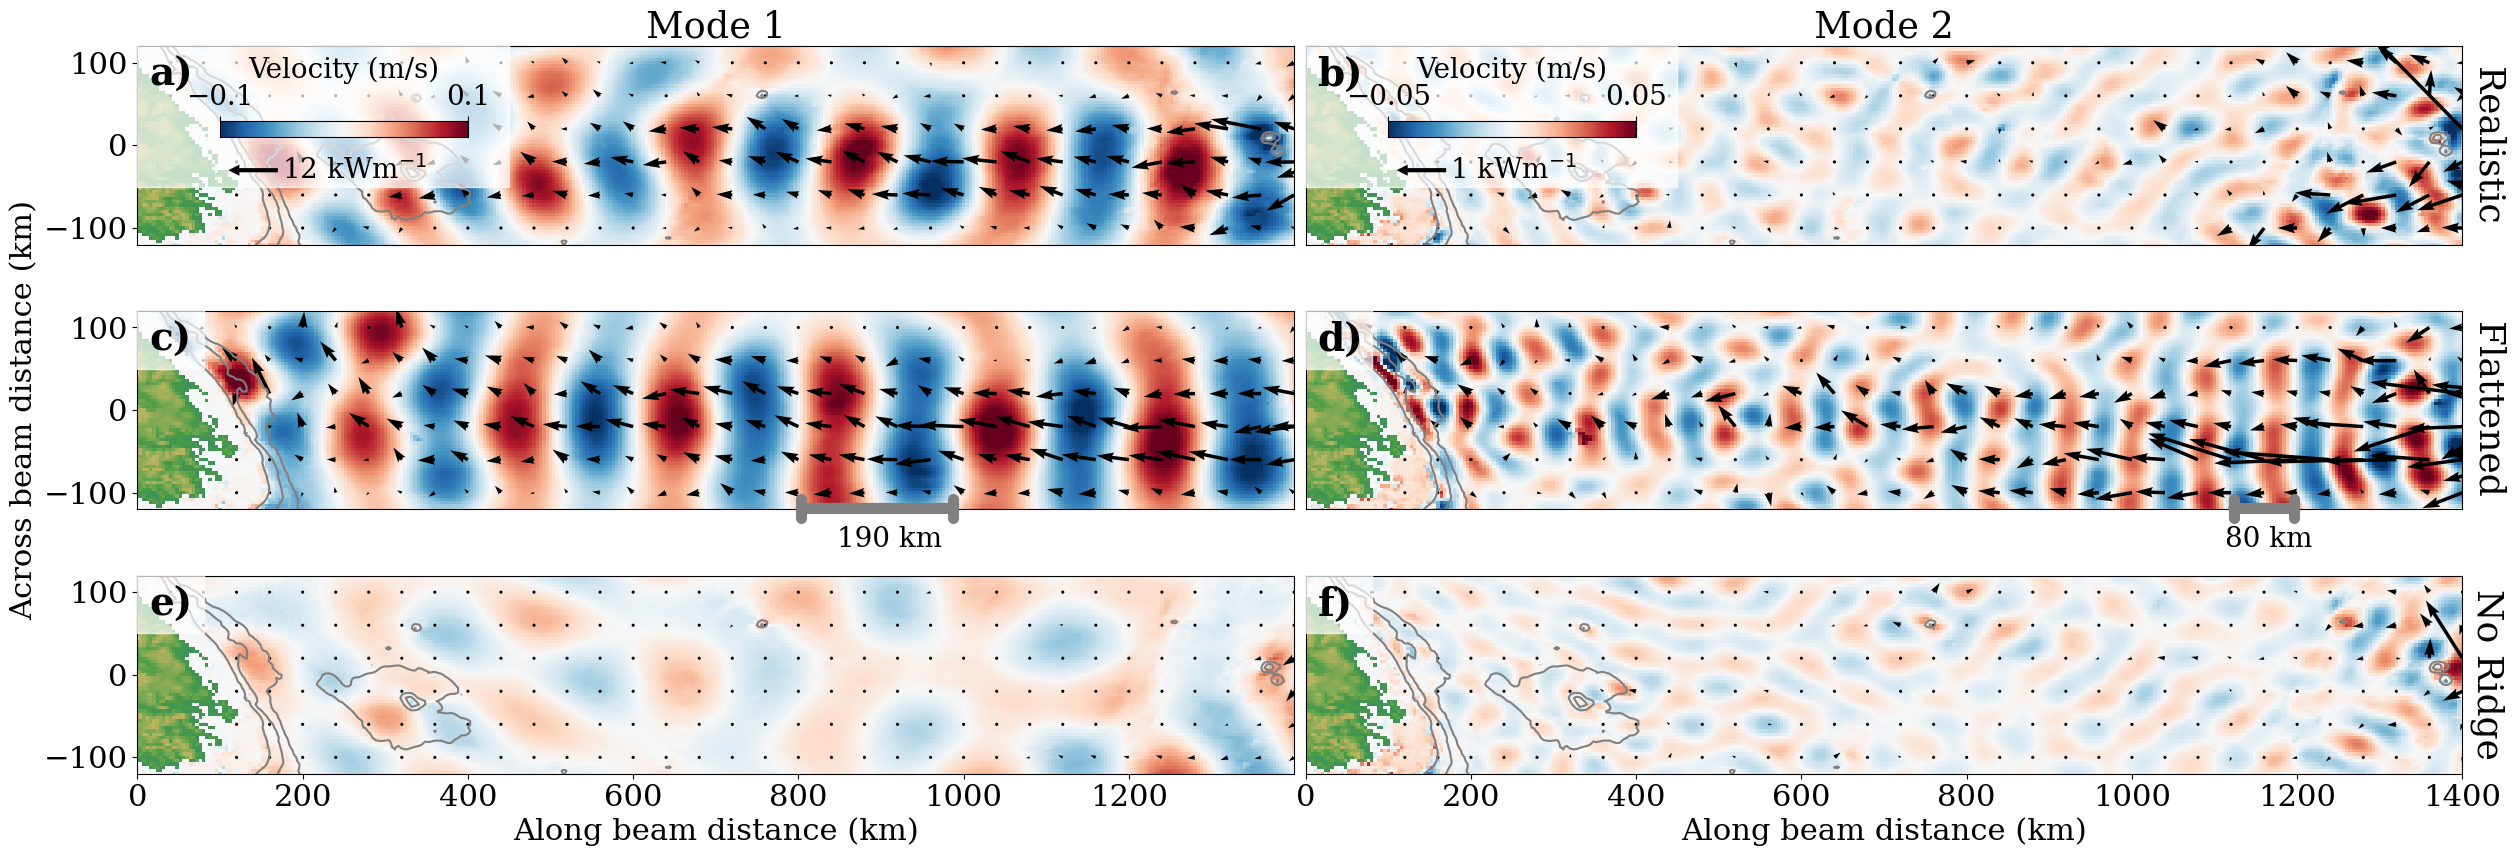

In [39]:

import matplotlib.gridspec as gridspec
font = {'family' : 'serif',
        'weight':'normal',
        'size'   : 22}
matplotlib.rc('font', **font)


fig = plt.figure(figsize = (30,10))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1],hspace = 0.1,wspace = 0.01)

ax = [fig.add_subplot(gs[i,j]) for i in range(3) for j in range(2)]
ax = np.array(ax).reshape(3,2)
umax_mode1 = 0.1
umax_mode2 = 0.05
scale = 250000
for i,expt in enumerate(["full-20","smooth-20","beamless-20"]):
    plot_velocity_quiver(expt,ax[i,0],xlim = slice(0,None),ylim = slice(-100,100),mode = 0,scale = scale,umax = umax_mode1,t0_u = 140,width = 0.003)
    data[expt].bathy.plot.contour(ax = ax[i,0],levels = contours,colors = "grey",lineweights = 2,linestyles = "solid")
    data[expt].bathy.plot.contour(ax = ax[i,1],levels = contours,colors = "grey",lineweights = 2,linestyles = "solid")
    plot_velocity_quiver(expt,ax[i,1],xlim = slice(0,None),ylim = slice(-100,100),mode = 1,scale = scale / 10,umax = umax_mode2,t0_u = 140,width = 0.003)


for a in ax[:,1]:
    a.set_yticks([])
    a.set_label([])

for a in ax[0:2,:].flatten():
    a.set_xticks([])
    a.set_label([])

for a in ax.flatten():
    a.set_title("")
    a.set_xlabel("")
    a.set_ylabel("")
    # a.axis("equal")
    a.set_aspect('equal', 'box')
    a.set_xlim(0,1400)
    a.set_ylim(-120,120)


ax[0,0].set_title("Mode 1")
ax[0,1].set_title("Mode 2")
ax[1,0].set_ylabel("Across beam distance (km)")
ax[0,1].set_ylabel("Realistic",rotation = 270,labelpad = 30)
ax[1,1].set_ylabel("Flattened",rotation = 270,labelpad = 30)
ax[2,1].set_ylabel("No Ridge",rotation = 270,labelpad = 30)
for i in range(3):
    ax[i,1].yaxis.set_label_position("right")  # Set the label position to the rightax[i,1].tick_params(axis='y', labelsize=22)  # Set font size for y-axis labels
    ax[i,0].set_yticks([-100,0,100])
    ax[i,1].yaxis.label.set_size(26)  # Set font size for y-axis labels

ax[2,0].set_xlabel("Along beam distance (km)")
ax[2,1].set_xlabel("Along beam distance (km)")



efmax = 12
## Add our legend
umax = umax_mode1
for i in range(2):
    patch = ax[0,i].add_patch(matplotlib.patches.Rectangle((0, -50), 450, 300, color='white', alpha=0.7))
    cax1 = ax[0,i].inset_axes([100, 10, 300, 20],transform=ax[0,i].transData)  # Adjust size and location
    patch.set_zorder(9)
    cax1.set_zorder(10)  # Bring the patch to the front
    cbar = plt.colorbar(
        plt.cm.ScalarMappable(cmap="RdBu_r", norm=plt.Normalize(vmin=-1 * umax, vmax=umax)),
        cax=cax1,
        orientation='horizontal',
        location = "top",
        label = "Velocity (m/s)",
    )
    cbar.set_ticks([-umax,umax])
    cax1.tick_params(labelsize=20, color="black", labelcolor="black")  # Set font size and color for colorbar ticks
    cax1.xaxis.label.set_size(20)  # Set font size for colorbar label
    cax1.xaxis.label.set_color("black")  # Set label color to black
    ax[0,i].annotate('', xy=(110, -30),xytext=(170, -30),
                arrowprops=dict(facecolor="black", width=3, headwidth=8, headlength = 8, edgecolor="none")).set_zorder(12)
    ax[0,i].text(175, -30, str(efmax) + r" kWm$^{-1}$", color = "black", fontsize = 20, ha = "left", va = "center").set_zorder(12)

    efmax = 1
    umax = umax_mode2

ax[2,0].set_xticks([0,200,400,600,800,1000,1200])

for i, a in enumerate(ax.flatten()):
    if i > 1:
        patch = a.add_patch(matplotlib.patches.Rectangle((0, 50), 80, 200, color='white', alpha=0.7))
    patch.set_zorder(9)
    a.text(0.01, 0.95, f"{chr(97+i)})", transform=a.transAxes, fontsize=28, fontweight='bold', va='top', ha='left').set_zorder(10)

## Add lines for wavelengths
line = ax[1,1].annotate("",xy = (1120,-119),xytext = (1200,-119),
                        arrowprops=dict(facecolor="black",arrowstyle = "|-|,widthA=0.3,widthB=0.3",lw = 8,color = "grey",joinstyle = "miter",alpha = 1))
line = ax[1,0].annotate("",xy = (810 - 10,-119),xytext = (1000 - 10,-119),
                        arrowprops=dict(facecolor="black",arrowstyle = "|-|,widthA=0.3,widthB=0.3",lw = 8,color = "grey",joinstyle = "miter",alpha = 1))
ax[1,0].text(910, -140, "190 km", color = "black", fontsize = 20, ha = "center", va = "top")
ax[1,1].text(1165, -140, "80 km", color = "black", fontsize = 20, ha = "center", va = "top")

# Fig 3: Mode 1 propagation w resolution

         3.8 mW/m per m
         2.7 mW/m per m
         2.1 mW/m per m
         1.3 mW/m per m


Text(0.01, 0.95, 'd)')

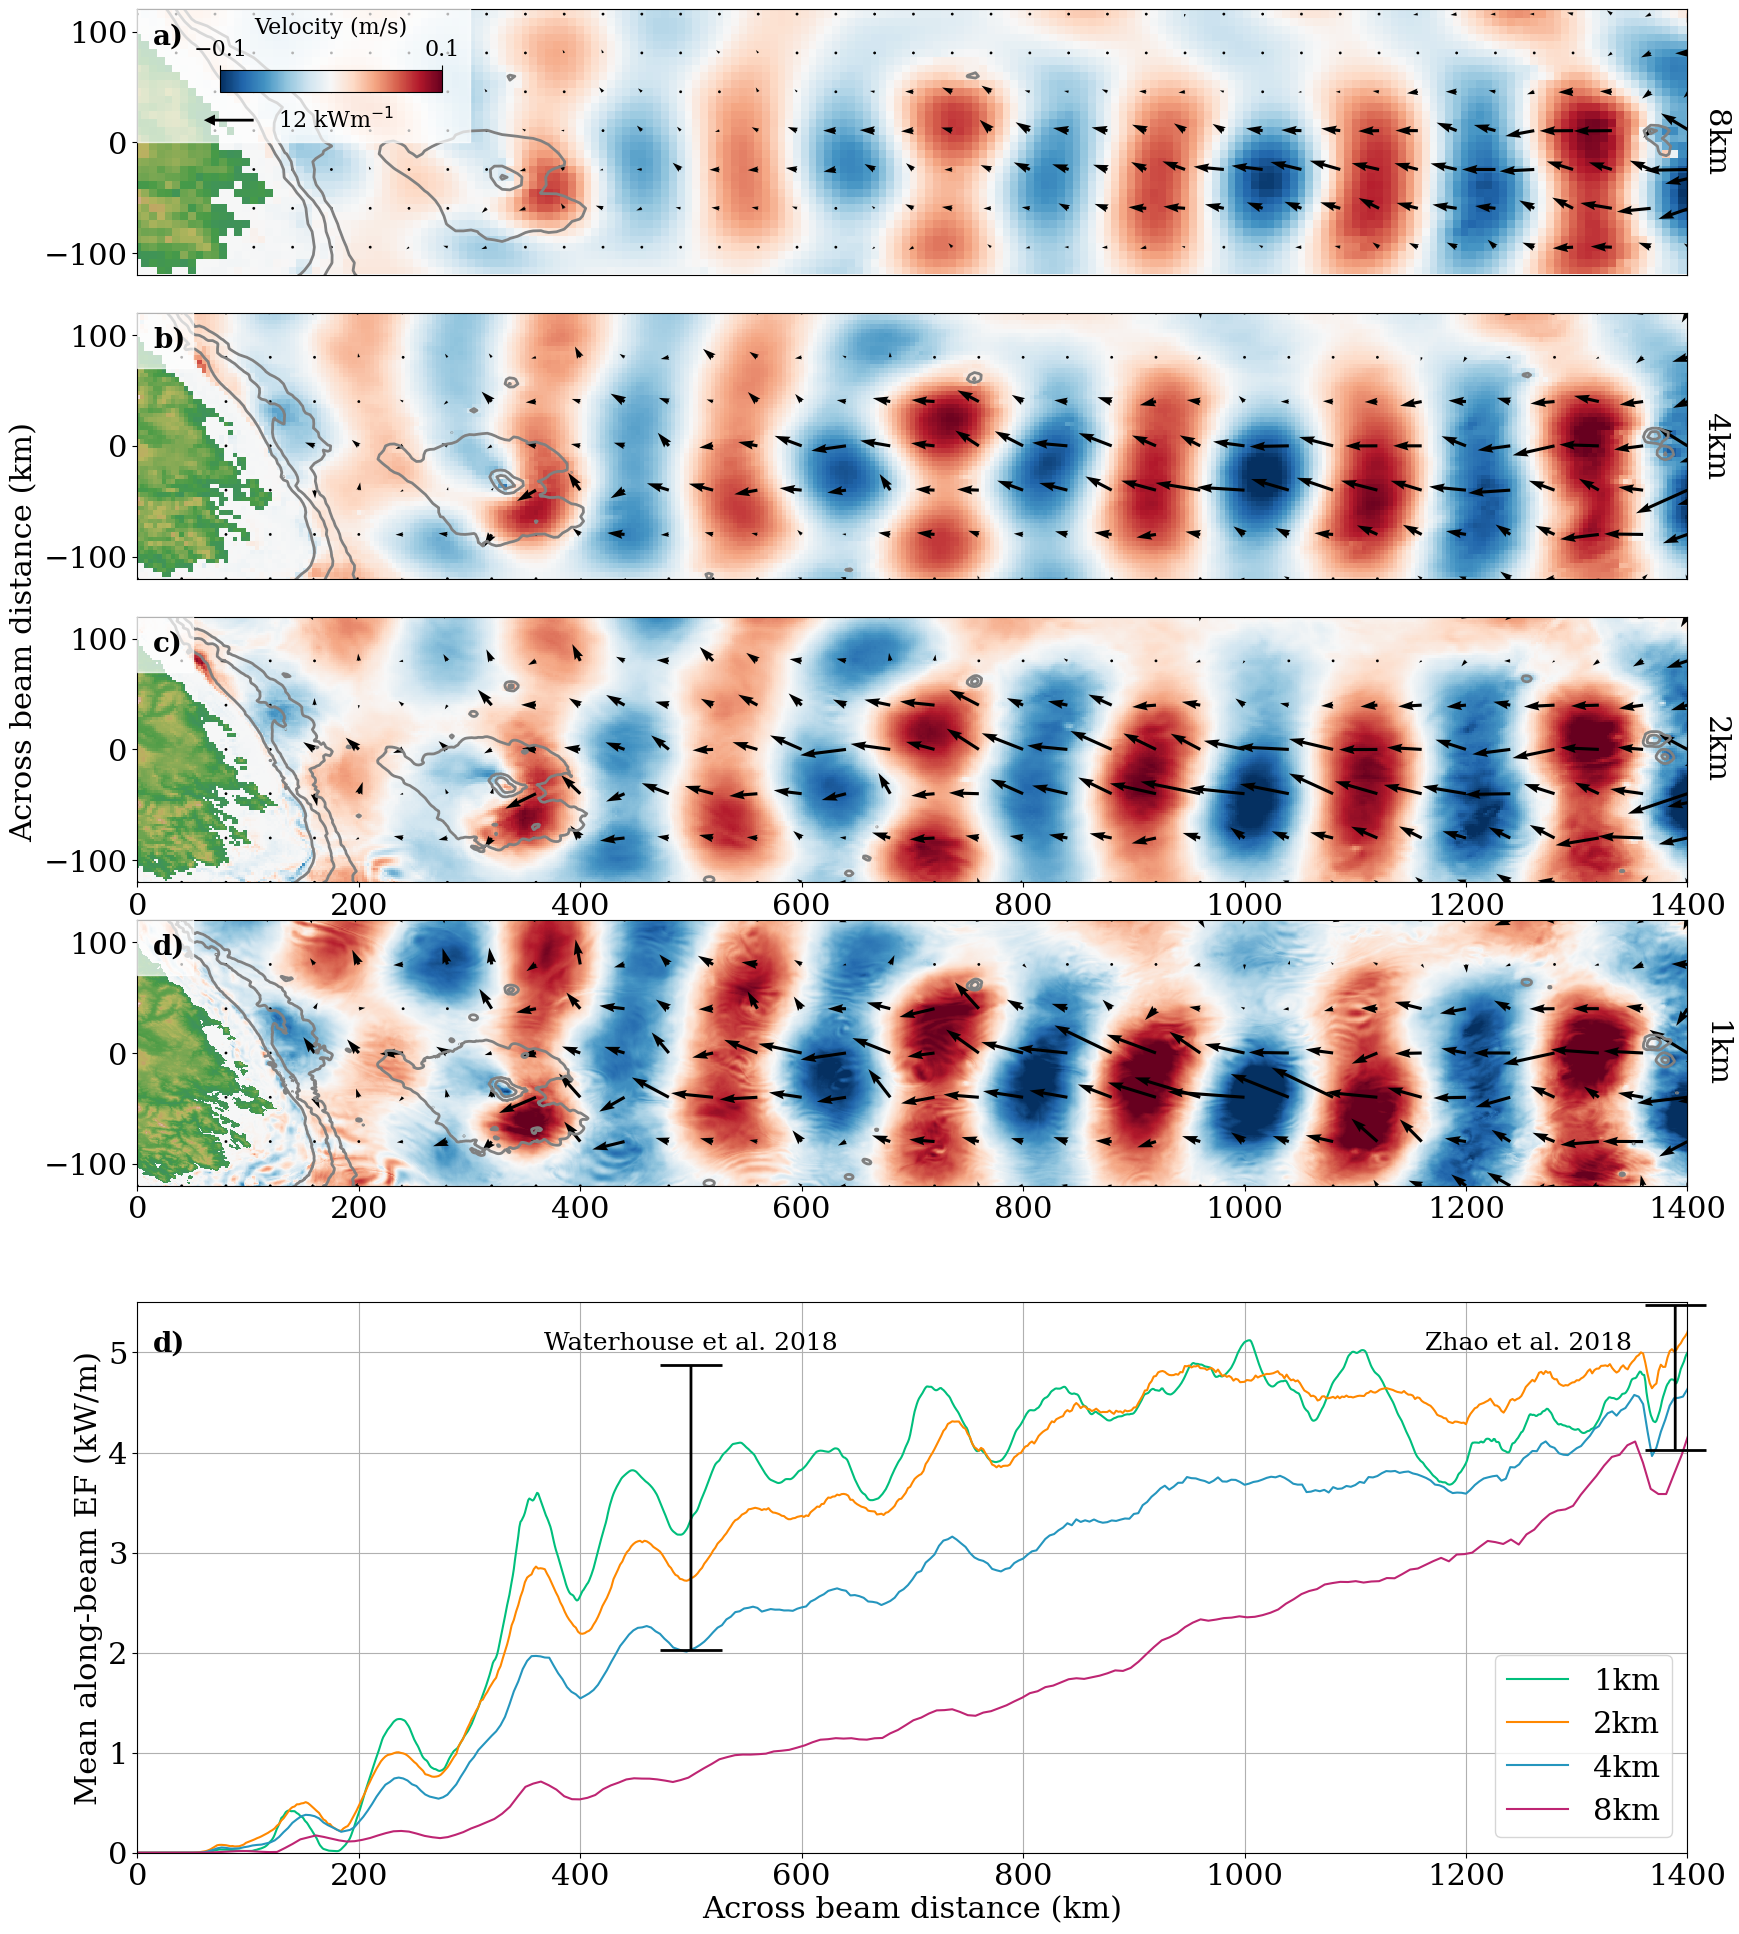

In [7]:
    
fig = plt.figure(figsize = (20,24))
gs = gridspec.GridSpec(6, 1, height_ratios=[1, 1, 1, 1,0.2,2],hspace = 0.1,wspace = 0.1)

ax = [fig.add_subplot(gs[i]) for i in range(4)]
ax = np.array(ax)
ax_lineplot = fig.add_subplot(gs[5])

umax = 0.1
scale = 250000

for i,expt in enumerate(["full-10","full-20","full-40","full-80"]):
    plot_velocity_quiver(expt,ax[i],xlim = slice(0,None),ylim = slice(None,None),mode = 0,scale = scale,umax = umax)
    data[expt].bathy.plot.contour(ax = ax[i],levels = contours,colors = "grey",linewidths = 2,linestyles = ["solid"])

for i,a in enumerate(ax.flatten()):
    a.set_title("")
    a.set_xlabel("")
    a.set_aspect("equal")
    if i < 2:
        a.set_xticks([])
    a.set_ylabel("")
    a.set_yticks([])

    b = a.secondary_yaxis('right')
    b.set_ylabel('')
    a.set_yticks([-100,0,100])
    b.set_yticks([])
    if i == 0:
        b.set_ylabel("8km",rotation = 270,labelpad = 30)
    elif i == 1:
        b.set_ylabel("4km",rotation = 270,labelpad = 30)
    elif i == 2:
        b.set_ylabel("2km",rotation = 270,labelpad = 30)
    elif i == 3:
        b.set_ylabel("1km",rotation = 270,labelpad = 30)
    a.set_ylim(-120,120)
    a.set_xlim(0,1400)


ax[0].set_title("")
ax[1].set_ylabel("Across beam distance (km)                                      ")

efmax = 12
## Add our legend
patch = ax[0].add_patch(matplotlib.patches.Rectangle((0, 0), 300, 230, color='white', alpha=0.7))
cax1 = ax[0].inset_axes([75, 45, 200, 20],transform=ax[0].transData)  # Adjust size and location
patch.set_zorder(9)
cax1.set_zorder(10)  # Bring the patch to the front
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap="RdBu_r", norm=plt.Normalize(vmin=-1 * umax, vmax=umax)),
    cax=cax1,
    orientation='horizontal',
    location = "top",
    label = "Velocity (m/s)",
)
cbar.set_ticks([-umax,umax])

cax1.tick_params(labelsize=16, color="black", labelcolor="black")  # Set font size and color for colorbar ticks
cax1.xaxis.label.set_size(16)  # Set font size for colorbar label
cax1.xaxis.label.set_color("black")  # Set label color to black
ax[0].annotate('', xy=(60, 20), xytext=(105, 20),
            arrowprops=dict(facecolor="black", width=2, headwidth=8, headlength = 8, edgecolor="none")).set_zorder(12)
ax[0].text(180, 20, str(efmax) + r" kWm$^{-1}$", color = "black", fontsize = 16, ha = "center", va = "center").set_zorder(12)


lineplot_colours = ['#be2573','#2596be','#ff8800',"#00bf7c"]
m1_10 = (-1 * data[f"full-10"].EF_alongbeam).isel(mode = 0).sel(yb = slice(-80,80),xb = slice(0,None)).mean("yb") / 1000
m1_20 = (-1 * data[f"full-20"].EF_alongbeam).isel(mode = 0).sel(yb = slice(-80,80),xb = slice(0,None)).mean("yb") / 1000
m1_40 = (-1 * data[f"full-40"].EF_alongbeam).isel(mode = 0).sel(yb = slice(-80,80),xb = slice(0,None)).mean("yb") / 1000
m1_80 = (-1 * data[f"full-80"].EF_alongbeam).isel(mode = 0).sel(yb = slice(-80,80),xb = slice(0,None)).mean("yb") / 1000


for i,d in enumerate([m1_10,m1_20,m1_40,m1_80]):
    d = d.sel(xb = slice(400,None))

    linregress_result = scipy.stats.linregress(d.xb.values, d.values) # initially as kW / m / km. Same as W/m per m
    print(f"{1000 * linregress_result.slope:>12.1f} mW/m per m")

m1_80.plot(ax = ax_lineplot,label = "1km",color = lineplot_colours[3])
m1_40.plot(ax = ax_lineplot,label = "2km",color = lineplot_colours[2])
m1_20.plot(ax = ax_lineplot,label = "4km",color = lineplot_colours[1])
m1_10.plot(ax = ax_lineplot,label = "8km",color = lineplot_colours[0])
ax_lineplot.legend()
ax_lineplot.set_title("")
ax_lineplot.set_xlim(0,1400)
ax_lineplot.set_ylim(0,5.5)
ax_lineplot.set_ylabel("Mean along-beam EF (kW/m)")
ax_lineplot.set_xlabel("Across beam distance (km)")

## Plot the Waterhouse figures

ax_lineplot.annotate('', xy=(500, 3.4 - 1.4), xytext=(500, 3.4 + 1.5),transform=ax_lineplot.transData,
            arrowprops=dict(arrowstyle="|-|",color="black", lw=2,capstyle='butt',joinstyle='miter')).set_zorder(12)
ax_lineplot.text(500,5.1, "Waterhouse et al. 2018", ha='center', va='center', transform=ax_lineplot.transData, fontsize=18)
ax_lineplot.annotate('', xy=(1389, 4), xytext=(1389, 5.5),transform=ax_lineplot.transData,
            arrowprops=dict(arrowstyle="|-|",color="black", lw=2,capstyle='butt',joinstyle='miter')).set_zorder(12)
ax_lineplot.text(1350,5.1, "Zhao et al. 2018", ha='right', va='center', transform=ax_lineplot.transData, fontsize=18)

ax_lineplot.grid()

## Add letter to each figure
for i, a in enumerate(ax.flatten()):
    if i != 0:
        patch = a.add_patch(matplotlib.patches.Rectangle((0, 70), 50, 200, color='white', alpha=0.7))
    patch.set_zorder(9)
    a.text(0.01, 0.95, f"{chr(97+i)})", transform=a.transAxes, fontsize=20, fontweight='bold', va='top', ha='left').set_zorder(10)
ax_lineplot.text(0.01, 0.95, "d)", transform=ax_lineplot.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')


# Fig4: KE decomposition in middle of beam

In [9]:
## First, collect the barotropic data
for expt in ["full-10","beamless-10","beamless-20","full-20","full-40","beamless-40","smooth-10","smooth-20","smooth-40"]:
    path = Path(f"/scratch/nm03/ab8992/test/outputs/") / expt / "filtered_ke_bt.nc"
    data[expt] = xr.merge([
        data[expt],
        xr.open_dataset(path,decode_times=False)
    ]
    )

Text(0.5, 1.0, '')

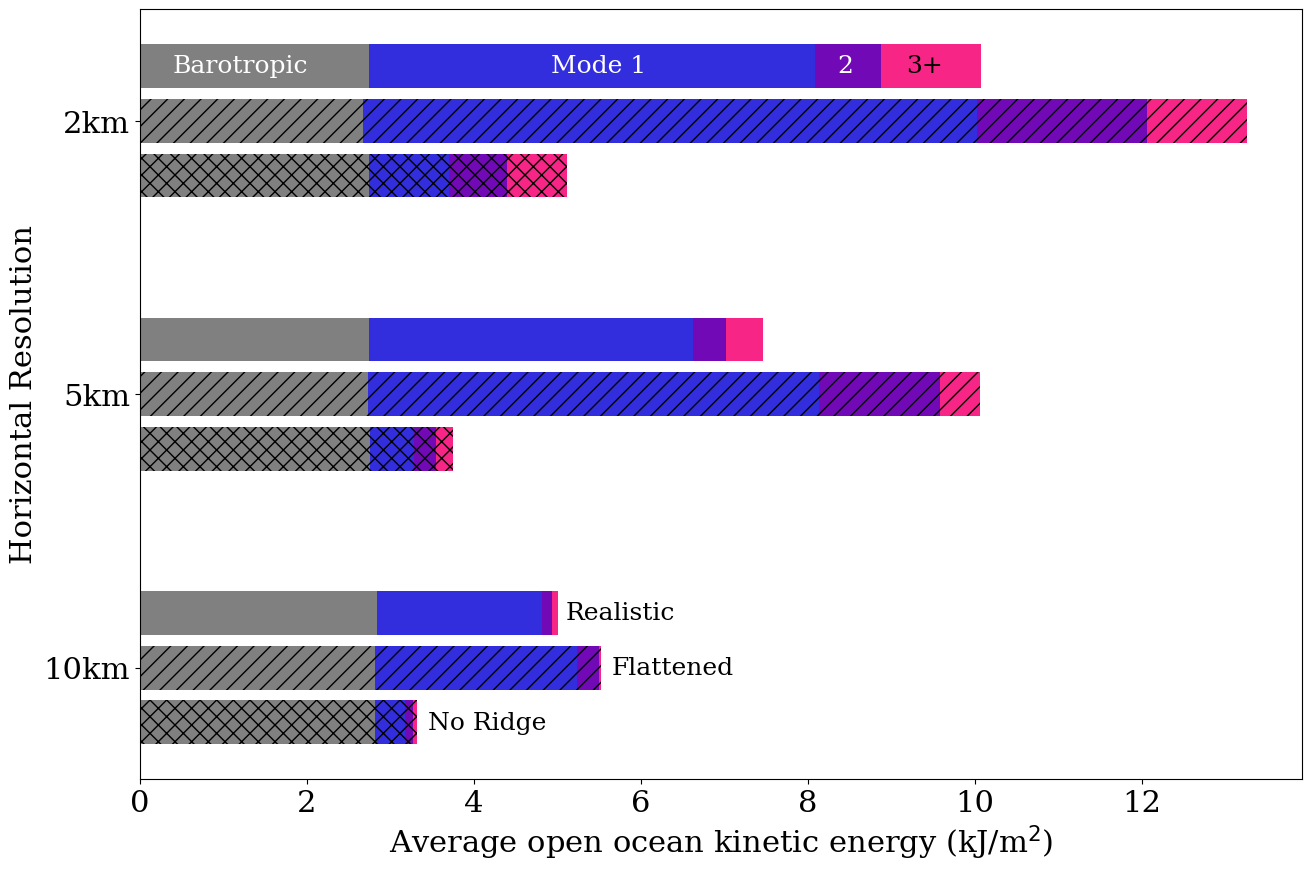

In [ ]:


#TODO load barotropic

def ShelfMask(data):
    return data.sel(xb = slice(500,1000))

# ShelfMask(data["full-40"]).filtered_dissipation.plot()
expts = ["beamless-10","smooth-10","full-10","beamless-20","smooth-20","full-20","beamless-40","smooth-40","full-40"]

# total_energy = 1000 * np.array([ShelfMask(data[expt]).raw_dissipation.mean("xb").mean("yb").values for expt in expts])
mode1 = np.array([ShelfMask(data[expt]).KE.isel(mode = 0).mean("xb").mean("yb").values for expt in expts])
mode2 = np.array([ShelfMask(data[expt]).KE.isel(mode = 1).mean("xb").mean("yb").values for expt in expts])
mode3 = np.array([ShelfMask(data[expt]).KE.isel(mode = slice(2,None)).sum("mode").mean("xb").mean("yb").values for expt in expts])
barot = np.array([
    (
        ShelfMask(data[expt]).filtered_KE_bt.mean("xb").mean("yb").values
        ) for expt in expts
    ])




group_gap = 1  # Gap between groups
bar_positions = np.array([
    0, 1, 2,  # First group
    3 + group_gap, 4 + group_gap, 5 + group_gap,  # Second group
    6 + 2 * group_gap, 7 + 2 * group_gap, 8 + 2 * group_gap  # Third group
])

colours_blank = ['lightgrey','#ecbed5', '#d87cab', '#be2573']  
colours_full = ['lightgrey','#bee0ec', '#7cc0d8', '#2596be']  
colours_smooth = ['lightgrey','#ffe7cc','#ffc480','#ff8800']

colours_blank = ['lightgrey','#ecbed5', '#bee0ec', '#ffe7cc']  
colours_full = ['darkgrey','#d87cab', '#7cc0d8', '#ffc480']  
colours = ['grey','#3a0ca3','#2596be','#ff8800']
colours = ['grey',"#332edd","#7209b7","#f72585"]
alphablank = 0.6
alphafull = 0.8
alphablank = 1
alphafull = 1


fig, ax = plt.subplots(figsize = (15,10))

# Use horizontal bar positions
group_gap = 2
bar_positions = np.array([
    0, 1, 2, 5, 6, 7, 10, 11, 12
])
hatchsmooth ='//'
hatchblank = 'xx'


# Plot horizontal bars (barh)

blank1 = ax.barh(bar_positions[[0,3,6]], barot[[0,3,6]], label='Barotropic M2', color=colours[0], alpha=alphablank,hatch = hatchblank)
blank2 = ax.barh(bar_positions[[0,3,6]], mode1[[0,3,6]], left=barot[[0,3,6]], label='M2 Mode 1', color=colours[1], alpha=alphablank,hatch = hatchblank)
blank3 = ax.barh(bar_positions[[0,3,6]], mode2[[0,3,6]], left=barot[[0,3,6]] + mode1[[0,3,6]], label='M2 Mode 2', color=colours[2], alpha=alphablank,hatch = hatchblank)
blank4 = ax.barh(bar_positions[[0,3,6]], mode3[[0,3,6]], left=barot[[0,3,6]] + mode1[[0,3,6]] + mode2[[0,3,6]], label='M2 Mode 3+', color=colours[3], alpha=alphablank,hatch = hatchblank)

smooth1 = ax.barh(bar_positions[[1,4,7]], barot[[1,4,7]], label='Barotropic M2', color=colours[0], alpha=alphafull,hatch = hatchsmooth)
smooth2 = ax.barh(bar_positions[[1,4,7]], mode1[[1,4,7]], left=barot[[1,4,7]], label='M2 Mode 1', color=colours[1], alpha=alphafull,hatch = hatchsmooth)
smooth3 = ax.barh(bar_positions[[1,4,7]], mode2[[1,4,7]], left=barot[[1,4,7]] + mode1[[1,4,7]], label='M2 Mode 2', color=colours[2], alpha=alphafull,hatch = hatchsmooth)
smooth4 = ax.barh(bar_positions[[1,4,7]], mode3[[1,4,7]], left=barot[[1,4,7]] + mode1[[1,4,7]] + mode2[[1,4,7]], label='M2 Mode 3+', color=colours[3], alpha=alphafull,hatch = hatchsmooth)

full1 = ax.barh(bar_positions[[2,5,8]], barot[[2,5,8]], label='Barotropic M2', color=colours[0])
full2 = ax.barh(bar_positions[[2,5,8]], mode1[[2,5,8]], left=barot[[2,5,8]], label='M2 Mode 1', color=colours[1])
full3 = ax.barh(bar_positions[[2,5,8]], mode2[[2,5,8]], left=barot[[2,5,8]] + mode1[[2,5,8]], label='M2 Mode 2', color=colours[2])
full4 = ax.barh(bar_positions[[2,5,8]], mode3[[2,5,8]], left=barot[[2,5,8]] + mode1[[2,5,8]] + mode2[[2,5,8]], label='M2 Mode 3+', color=colours[3])

ax.set_yticks([1, 6, 11])
ax.set_yticklabels(["10km", "5km", "2km"])


# Add text annotations (swap x/y)
ax.text(1.2, 12, "Barotropic", va="center", ha="center", fontsize=18, rotation=0, color="white", font=font)
ax.text(5.5, 12, "Mode 1", va="center", ha="center", fontsize=18, rotation=0, color="white", font=font)
ax.text(8.45, 12, "2", va="center", ha="center", fontsize=18, rotation=0, color="white", font=font)
ax.text(9.4, 12, "3+", va="center", ha="center", fontsize=18, rotation=0, color="black", font=font)

ax.text(3.45, 0, "No Ridge", va="center", ha="left", fontsize=18, rotation=0, color="black", font=font)
ax.text(5.65, 1, "Flattened", va="center", ha="left", fontsize=18, rotation=0, color="black", font=font)
ax.text(5.1, 2, "Realistic", va="center", ha="left", fontsize=18, rotation=0, color="black", font=font)

ax.set_xlabel("Average open ocean kinetic energy density (kJ/m$^2$)")
ax.set_ylabel("Horizontal Resolution")
ax.set_title("")

# fig.savefig("/home/ashley/Documents/PhD/Paper-Tasman-Tides/figures/KE_decomposition")
# fig.savefig("asdf")

# Fig5: KE Anomaly


        0.90         4.38        20.57
        0.53         3.35        15.81
        0.06         1.62         3.64


Text(0.01, 0.95, 'd)')

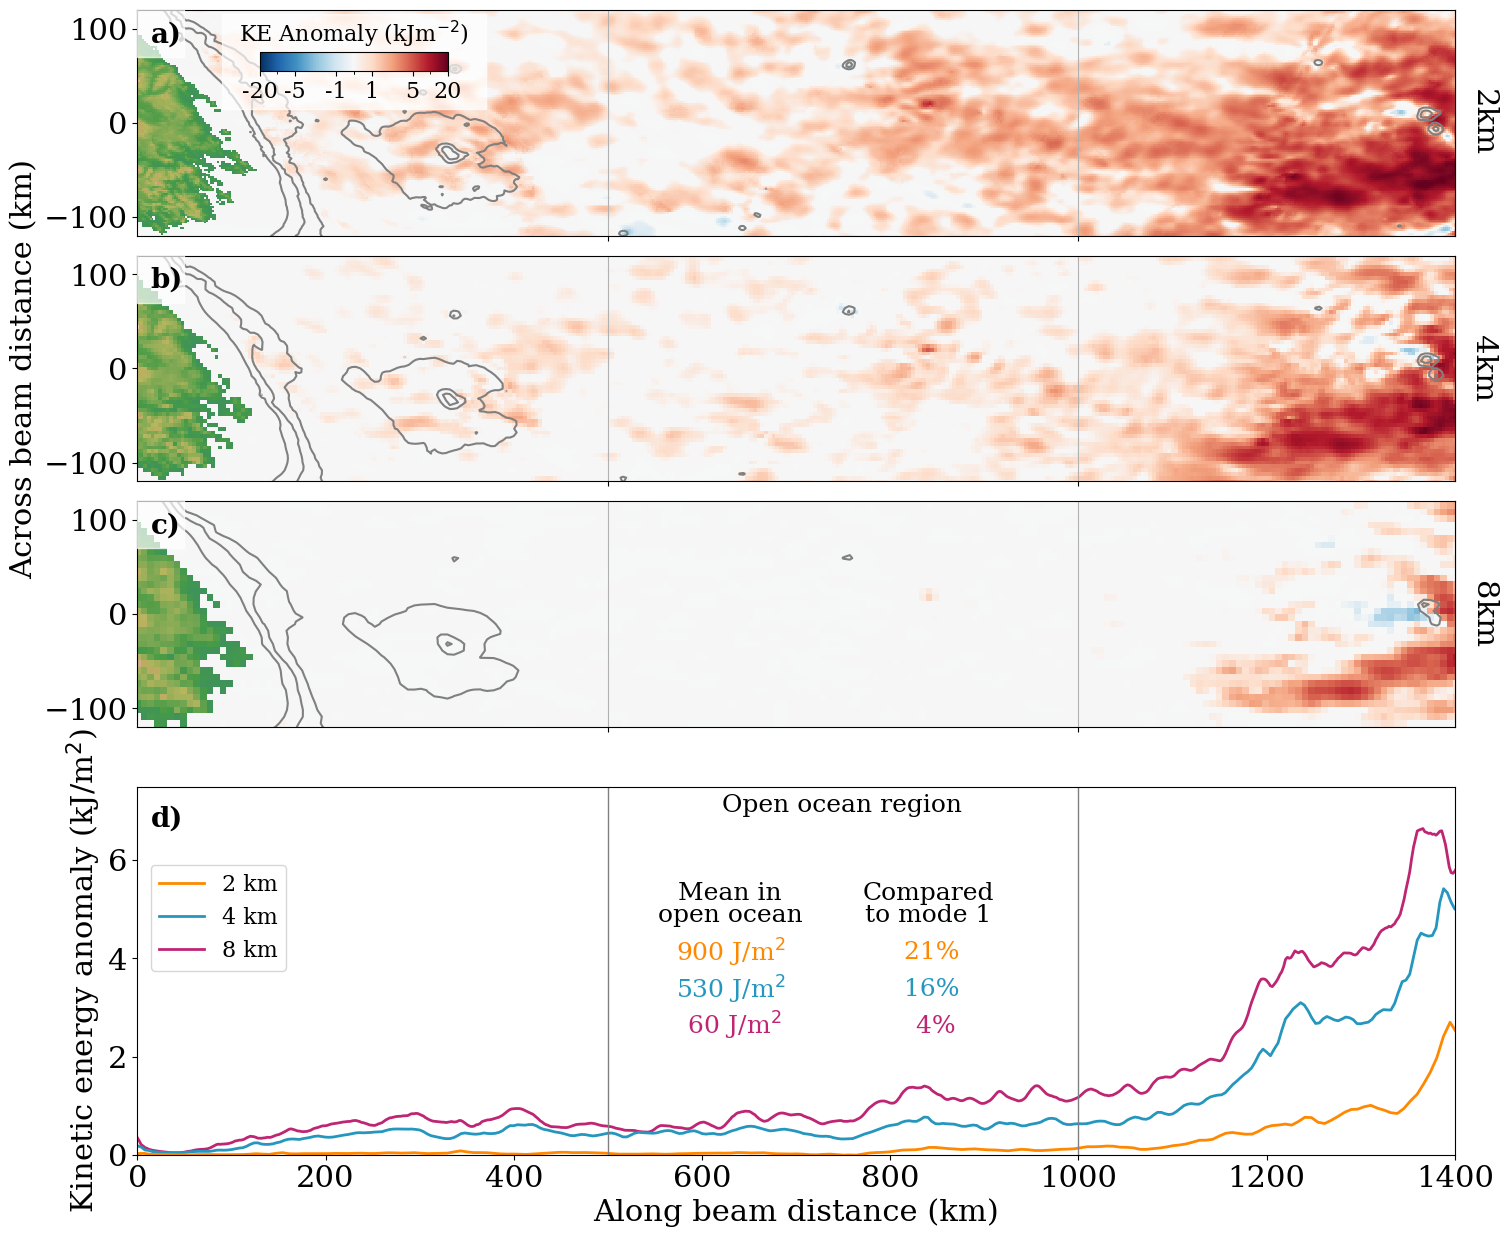

In [ ]:
### Add map plots of higher mode anomalies 
fig = plt.figure(figsize = (17,15))



gs = gridspec.GridSpec(5, 1, height_ratios=[1,  1,1, 0.2, 1.5], hspace=0.001, wspace=0.5)
ax = [fig.add_subplot(gs[i]) for i in range(3)]
ax_lineplot = fig.add_subplot(gs[4])

ax = np.array(ax).reshape(3)
scale = 20

import matplotlib.colors as colors
norm = colors.SymLogNorm(linthresh=0.5, linscale=0.002,vmin = -scale,vmax = scale,)


for i , res in enumerate([40,20,10]):
    #TODO Make a log colourbar here to apply to all axes
    yextent = slice(-120,120)
    m2data = (
        data[f"full-{res}"].KE - (data[f"beamless-{res}"].KE) 
    ).isel(mode = slice(1,None)).sum("mode")
    m2data.plot(ax = ax[i],cmap = "RdBu_r",add_colorbar = False,norm = norm)
    tt.plot_topo(ax[i], data[f"full-{res}"].bathy)  
    (data[f"full-{res}"].bathy).plot.contour(levels=contours,ax = ax[i],colors = "grey",lineweights = 2,linestyles = "solid")

    # Line plot
    m2data.sel(yb = yextent).mean("yb").plot(ax = ax_lineplot,color = lineplot_colours[i],linewidth = 2)
    m2data = m2data.sel(yb = yextent,xb = slice(500,1000)).mean(["xb","yb"]).values
    m1data = (
        data[f"full-{res}"].KE - (data[f"beamless-{res}"].KE) 
    ).isel(mode = 0).sel(xb = slice(500,1000),yb = yextent).mean(["xb","yb"]).values
    print(f"{m2data:>12.2f} {m1data:>12.2f} {100 * m2data/m1data:>12.2f}")




for i,a in enumerate(ax.flatten()):
    a.set_aspect("equal")
    a.set_title("")
    a.set_xlabel("")
    a.set_ylabel("")
    a.set_ylabel("")
    a.set_xticks([])
    a.set_xticks([500,1000])
    a.set_xticklabels([])
    a.grid(axis = "x")
    a.set_ylim(-120,120)
    a.set_xlim(0,1400)
    b = a.secondary_yaxis('right')
    b.set_ylabel('')
    b.set_yticks([])

    if i == 0:
        b.set_ylabel("2km",rotation = 270,labelpad = 30)
    elif i == 1:
        b.set_ylabel("4km",rotation = 270,labelpad = 30)
    elif i == 2:
        b.set_ylabel("8km",rotation = 270,labelpad = 30)
    elif i == 3:
        b.set_ylabel("1km",rotation = 270,labelpad = 30)
    a.set_ylim(-120,120)
    a.set_xlim(0,1400)
    # a.set_yticks([])
ax[1].set_ylabel("Across beam distance (km)")

legend_x =130
legend_y = 55

patch = ax[0].add_patch(matplotlib.patches.Rectangle((legend_x - 40, legend_y - 40), 280, 100, color='white', alpha=0.7))
cax1 = ax[0].inset_axes([legend_x, legend_y, 200, 20],transform=ax[0].transData)  # Adjust size and location
patch.set_zorder(9)
cax1.set_zorder(10)  # Bring the patch to the front
cbar = plt.colorbar(
    plt.cm.ScalarMappable(cmap="RdBu_r", norm=norm),
    cax=cax1,
    orientation='horizontal',
    location="bottom",
    label=r"KE Anomaly (kJm$^{-2}$)",
)
cbar.ax.xaxis.set_label_coords(0.5, 2.8)  # Adjust the title position to be higher
xticks = [-scale,-5,-1,1,5,scale ]
xticklabels = [str(i) for i in xticks]
cbar.set_ticks(xticks)
cbar.set_ticklabels(xticklabels)
cax1.tick_params(labelsize=16, color="black", labelcolor="black")  # Set font size and color for colorbar ticks
cax1.xaxis.label.set_size(16)  # Set font size for colorbar label
cax1.xaxis.label.set_color("black")  # Set label color to black


ax_lineplot.set_xlabel("Along beam distance (km)")
ax_lineplot.set_ylabel("KE density anomaly (kJ/m$^2$)")
ax_lineplot.set_xlim(0,1400)
# ax_lineplot.set_xticks([400,1000])

ax_lineplot.set_ylim(0,7.5)
ax_lineplot.set_title("")
# ax_lineplot.grid(axis = "x")
ax_lineplot.vlines(500,0,8,color = "grey",linestyle = "solid",linewidth = 1)
ax_lineplot.vlines(1000,0,8,color = "grey",linestyle = "solid",linewidth = 1)
## Plot line plots of each resolution
# for i, res in enumerate([10,20,40,80]):

# Add a custom legend to plot 1
custom_legend = [
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[2], lw=2, label='2 km'),
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[1], lw=2, label='4 km'),
    matplotlib.lines.Line2D([0], [0], color=lineplot_colours[0], lw=2, label='8 km'),
    # matplotlib.lines.Line2D([0], [0], color=lineplot_colours[3], lw=2, label='1')
]
ax_lineplot.text(0.535, 0.95, "Open ocean region", ha='center', va='center', transform=ax_lineplot.transAxes, fontdict=smallfont)
# ax_lineplot.text(0.85, 0.95, "Generation region", ha='center', va='center', transform=ax_lineplot.transAxes, fontsize=16)
# ax_lineplot.text(0.2, 0.95, "Shelf region", ha='center', va='center', transform=ax_lineplot.transAxes, fontsize=16)
ax_lineplot.legend(handles=custom_legend, loc=(0.01,0.5), fontsize=16)


#
ax_lineplot.text(0.6, 0.71, f"{'Compared'}", ha='center', va='center', transform=ax_lineplot.transAxes, color="black", fontdict=smallfont)
ax_lineplot.text(0.6, 0.65, f"{'to mode 1'}", ha='center', va='center', transform=ax_lineplot.transAxes, color="black", fontdict=smallfont)
ax_lineplot.text(0.45, 0.71, f"{'Mean in'}", ha='center', va='center', transform=ax_lineplot.transAxes, color="black", fontdict=smallfont)
ax_lineplot.text(0.45, 0.65, f"{'open ocean'}", ha='center', va='center', transform=ax_lineplot.transAxes, color="black", fontdict=smallfont)

ax_lineplot.text(0.6, 0.35, f"{'4%':>4}", ha='center', va='center', transform=ax_lineplot.transAxes, color = lineplot_colours[0],fontdict = smallfont)
ax_lineplot.text(0.6, 0.45, f"{'16%':>4}", ha='center', va='center', transform=ax_lineplot.transAxes, color = lineplot_colours[1],fontdict = smallfont)
ax_lineplot.text(0.6, 0.55, f"{'21%':>4}", ha='center', va='center', transform=ax_lineplot.transAxes, color = lineplot_colours[2],fontdict = smallfont)

ax_lineplot.text(0.45, 0.35, f"{r' 60 J/m$^{2}$'}", ha='center', va='center', transform=ax_lineplot.transAxes, color = lineplot_colours[0],fontdict = smallfont)
ax_lineplot.text(0.45, 0.45, f"{r'530 J/m$^{2}$'}", ha='center', va='center', transform=ax_lineplot.transAxes, color = lineplot_colours[1],fontdict = smallfont)
ax_lineplot.text(0.45, 0.55, f"{r'900 J/m$^{2}$'}", ha='center', va='center', transform=ax_lineplot.transAxes, color = lineplot_colours[2],fontdict = smallfont)

## Add letter to each figure
for i, a in enumerate(ax.flatten()):
    patch = a.add_patch(matplotlib.patches.Rectangle((0, 70), 50, 200, color='white', alpha=0.7))
    patch.set_zorder(9)
    a.text(0.01, 0.95, f"{chr(97+i)})", transform=a.transAxes, fontsize=20, fontweight='bold', va='top', ha='left').set_zorder(10)
ax_lineplot.text(0.01, 0.95, "d)", transform=ax_lineplot.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')


# Fig6: Rise dissipation

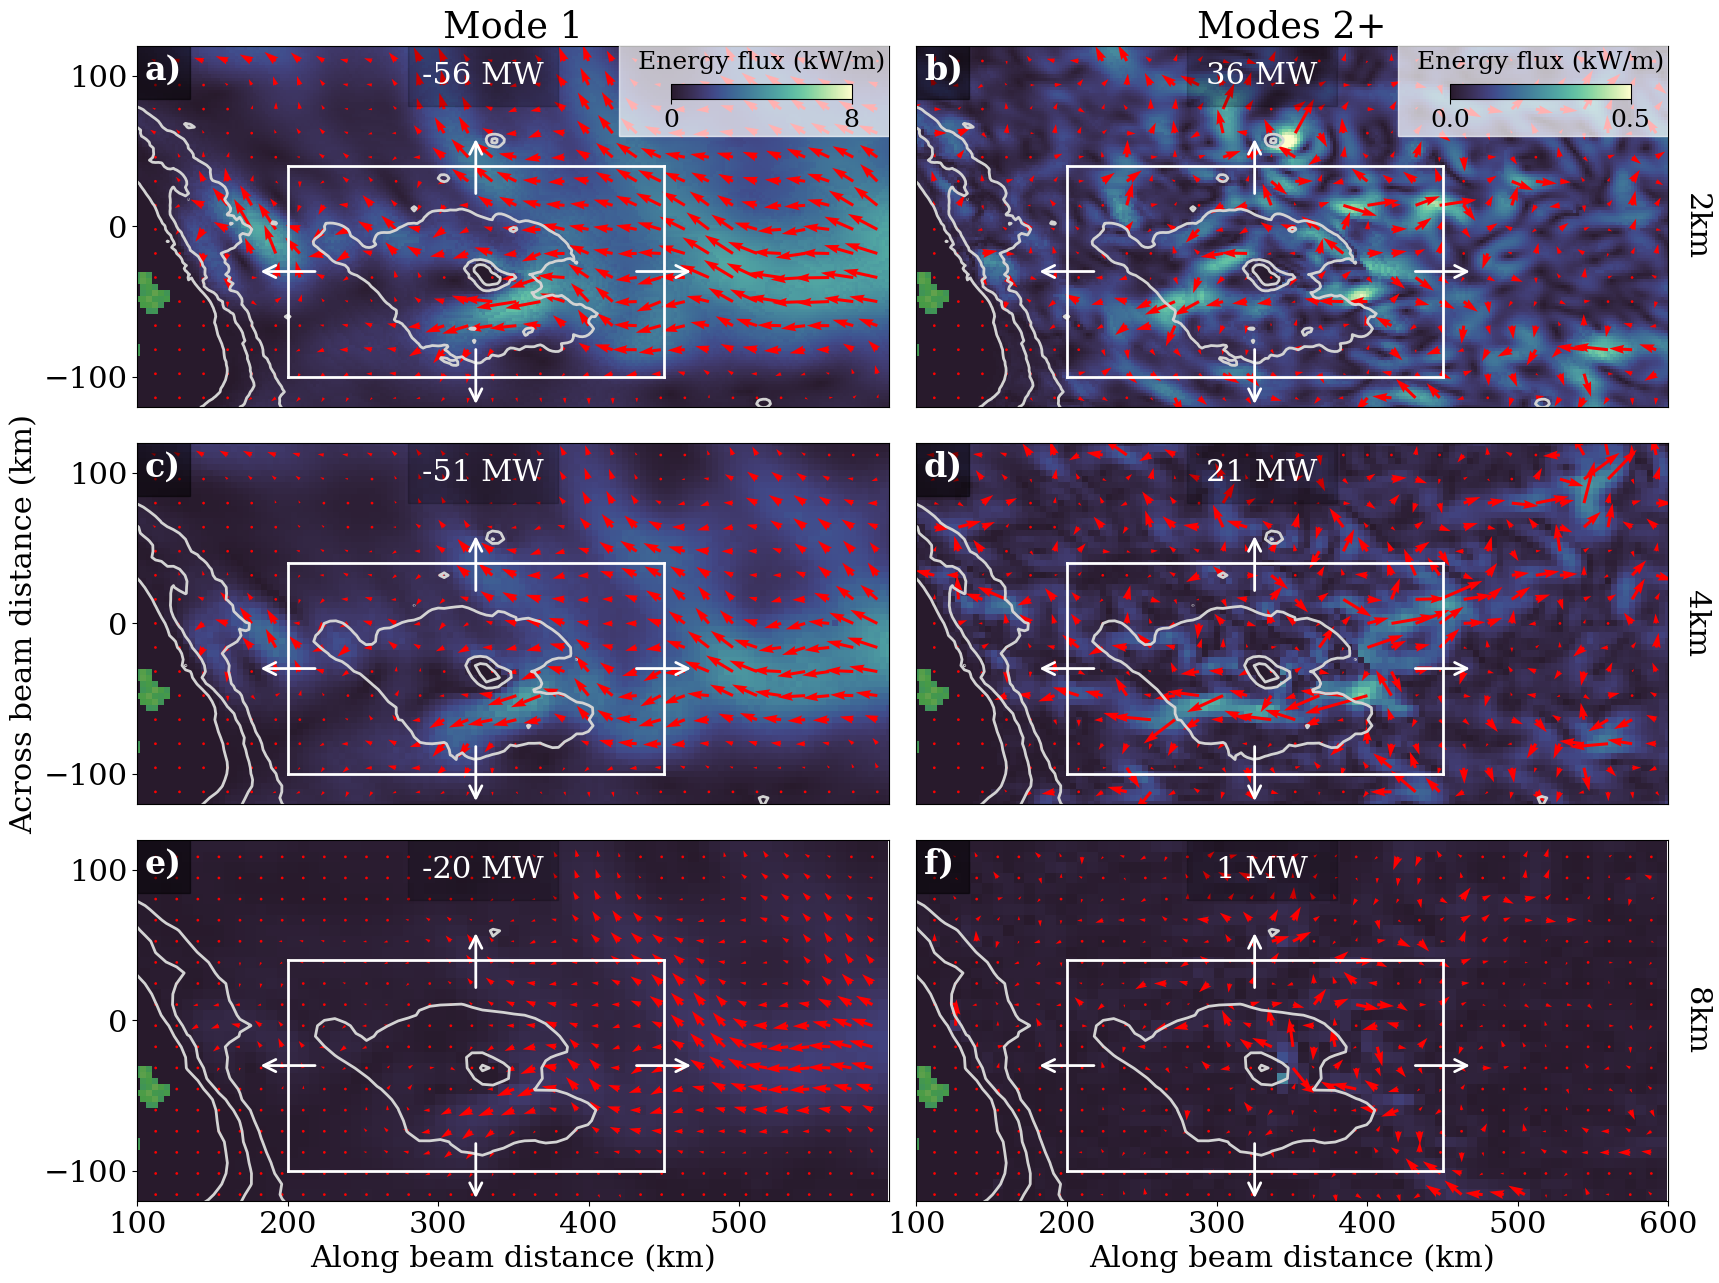

In [38]:
top,bottom,left,right = 40,-100,200,450
xtop,xbottom,xleft,xright = [left,right],[left,right],[left,left],[right,right]
ytop,ybottom,yleft,yright = [top,top],[bottom,bottom],[bottom,top],[bottom,top]
xs = [xtop,xbottom,xleft,xright]
ys = [ytop,ybottom,yleft,yright]
signs = [1,-1,-1,1]



xmax = 40
# fig,ax = plt.subplots(3,2,figsize=(20,20))
fig = plt.figure(figsize = (20,15))
gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1],hspace = 0.1,wspace = 0.01)

ax = [fig.add_subplot(gs[i,j]) for i in range(3) for j in range(2)]
ax = np.array(ax).reshape(3,2)

# toplot = data[expt].mean("time")
# # toplot = data[expt].isel(time = 1)

# for a in ax.flatten():
#     toplot.sel(xb = slice(0,xmax)).bathy.plot(vmax = 0, vmin = -4000, cmap = cmocean.cm.deep_r,ax = a,add_colorbar = False)
#     toplot.sel(xb=slice(0, xmax)).bathy.plot.contour(levels=[-1000,-2000,-3000],ax = a,colors = ["lightgrey","lightgrey","lightgrey"],linestyles = "dashed",lineweights = 2)

d = (data["full-10"] - data["beamless-10"]).isel(mode = [0])
plot_KE_quiver(d.EF_alongbeam,d.EF_acrossbeam,ax[2,0],mag_scale = 8000,arrow_scale = 50000,xs = xs,ys = ys,signs = signs)
d = (data["full-10"] - data["beamless-10"]).isel(mode = slice(1,None))
plot_KE_quiver(d.EF_alongbeam,d.EF_acrossbeam,ax[2,1],mag_scale = 500,arrow_scale = 2000,xs = xs,ys = ys,signs = signs)
d = (data["full-20"] - data["beamless-20"]).isel(mode = [0])
plot_KE_quiver(d.EF_alongbeam,d.EF_acrossbeam,ax[1,0],mag_scale = 8000,arrow_scale = 100000,xs = xs,ys = ys,signs = signs,spacing = 4)
d = (data["full-20"] - data["beamless-20"]).isel(mode = slice(1,None))
plot_KE_quiver(d.EF_alongbeam,d.EF_acrossbeam,ax[1,1],mag_scale = 500,arrow_scale = 4000,xs = xs,ys = ys,signs = signs,spacing = 4)
d = (data["full-40"] - data["beamless-40"]).isel(mode = [0])
plot_KE_quiver(d.EF_alongbeam,d.EF_acrossbeam,ax[0,0],mag_scale = 8000,arrow_scale = 100000,xs = xs,ys = ys,signs = signs,spacing = 8)
d = (data["full-40"] - data["beamless-40"]).isel(mode = slice(1,None))
plot_KE_quiver(d.EF_alongbeam,d.EF_acrossbeam,ax[0,1],mag_scale = 500,arrow_scale = 8000,xs = xs,ys = ys,signs = signs,spacing = 8)
# d = (data["full-80"] - data["beamless-80"]).isel(mode = [0])
# plot_KE_quiver(d.EF_alongbeam,d.EF_acrossbeam,ax[6],mag_scale = 40000,arrow_scale = 100000,xs = xs,ys = ys,signs = signs)
# d = (data["full-80"] - data["beamless-80"]).isel(mode = [1])
# plot_KE_quiver(d.EF_alongbeam,d.EF_acrossbeam,ax[7],mag_scale = 1000,arrow_scale = 20000,xs = xs,ys = ys,signs = signs)

for i,a in enumerate(ax.flatten()):
    data[["full-40","full-20","full-10"][i//2]].bathy.plot.contour(ax = a,levels = contours,colors= "lightgrey",linestyles = "solid",linewidths = 2)
    a.set_title("")
    a.set_ylabel("")
    a.set_xlabel("")
    a.set_xlim(100,600)
    a.set_xticks([])
    a.set_yticks([])
    # a.set_ylim(-120,80)
    a.set_aspect("equal")
    a.plot(xtop,ytop,color = "white",lw = 2)
    a.plot(xbottom,ybottom,color = "white",lw = 2)
    a.plot(xleft,yleft,color = "white",lw = 2)
    a.plot(xright,yright,color = "white",lw = 2)
    alen = 20
    a.annotate("",xytext=(np.mean(np.array(xtop)), ytop[0] - alen), xy=(np.mean(np.array(xtop)), ytop[0] + alen), arrowprops=dict(arrowstyle="->", color="white", lw=2))
    a.annotate("",xytext=(np.mean(np.array(xbottom)), ybottom[0] + alen), xy=(np.mean(np.array(xbottom)), ybottom[0] - alen), arrowprops=dict(arrowstyle="->", color="white", lw=2))
    a.annotate("",xytext=(xright[0] - alen,np.mean(np.array(yright))), xy=(xright[0] + alen,np.mean(np.array(yright))), arrowprops=dict(arrowstyle="->", color="white", lw=2))
    a.annotate("",xytext=(xleft[0] + alen,np.mean(np.array(yleft))), xy=(xleft[0] - alen,np.mean(np.array(yleft))), arrowprops=dict(arrowstyle="->", color="white", lw=2))

# Incoming: -183.1 -13.8 kW/m
# Outgoing: 72.1 8.0 kW/m
# Xterm: 21.5 -0.3 kW/m

ax[0,0].set_title("Mode 1")
ax[0,1].set_title("Modes 2+")
ax[1,0].set_ylabel("Across beam distance (km)")
ax[1,0].set_yticks([-100,0,100])
ax[2,0].set_yticks([-100,0,100])
ax[0,0].set_yticks([-100,0,100])
ax[0,1].set_ylabel("2km",rotation = 270,labelpad = 30)
ax[1,1].set_ylabel("4km",rotation = 270,labelpad = 30)
ax[2,1].set_ylabel("8km",rotation = 270,labelpad = 30)
for i in range(3):
    ax[i,1].yaxis.set_label_position("right")  # Set the label position to the rightax[i,1].tick_params(axis='y', labelsize=22)  # Set font size for y-axis labels
    # ax[i,0].set_yticks([-100,0,100])
    ax[i,1].yaxis.label.set_size(22)  # Set font size for y-axis labels
    ax[i,0].yaxis.label.set_size(22)  # Set font size for y-axis labels

ax[2,0].set_xlabel("Along beam distance (km)")
ax[2,1].set_xlabel("Along beam distance (km)")
ax[2,0].yaxis.label.set_size(22)
ax[2,1].yaxis.label.set_size(22)
ax[2,0].set_xticks([100,200,300,400,500])
ax[2,1].set_xticks([100,200,300,400,500,600])
# ax[2,1].set_xticks([0,100,200,300,400])

umax = 1
efmax = 1
# for i in range(3):
for j,scale in enumerate([8,0.5]):
    patch = ax[0,j].add_patch(matplotlib.patches.Rectangle((420, 60), 180, 70, color='white', alpha=0.7))
    cax1 = ax[0,j].inset_axes([455, 85, 120, 10],transform=ax[0,j].transData)  # Adjust size and location
    patch.set_zorder(9)
    cax1.set_zorder(10)  # Bring the patch to the front
    cbar = plt.colorbar(
        plt.cm.ScalarMappable(cmap=cmocean.cm.deep_r, norm=plt.Normalize(vmin=0, vmax=scale)),
        cax=cax1,
        orientation='horizontal',
        location="bottom",
        label=r"Energy flux (kW/m)",
    )
    cbar.ax.xaxis.set_label_coords(0.5, 3.2)  # Adjust the title position to be higher
    cbar.set_ticks([0,scale])
    cax1.tick_params(labelsize=18, color="black", labelcolor="black")  # Set font size and color for colorbar ticks
    cax1.xaxis.label.set_size(18)  # Set font size for colorbar label
    cax1.xaxis.label.set_color("black")  # Set label color to black

for i, a in enumerate(ax.flatten()):
    patch = a.add_patch(matplotlib.patches.Rectangle((100, 85), 35, 200, color='black', alpha=0.5))
    patch.set_zorder(9)
    a.text(0.01, 0.98, f"{chr(97+i)})", transform=a.transAxes, fontsize=24,color = "white", fontweight='bold', va='top', ha='left').set_zorder(10)


# Figs7-9: EF at shelf

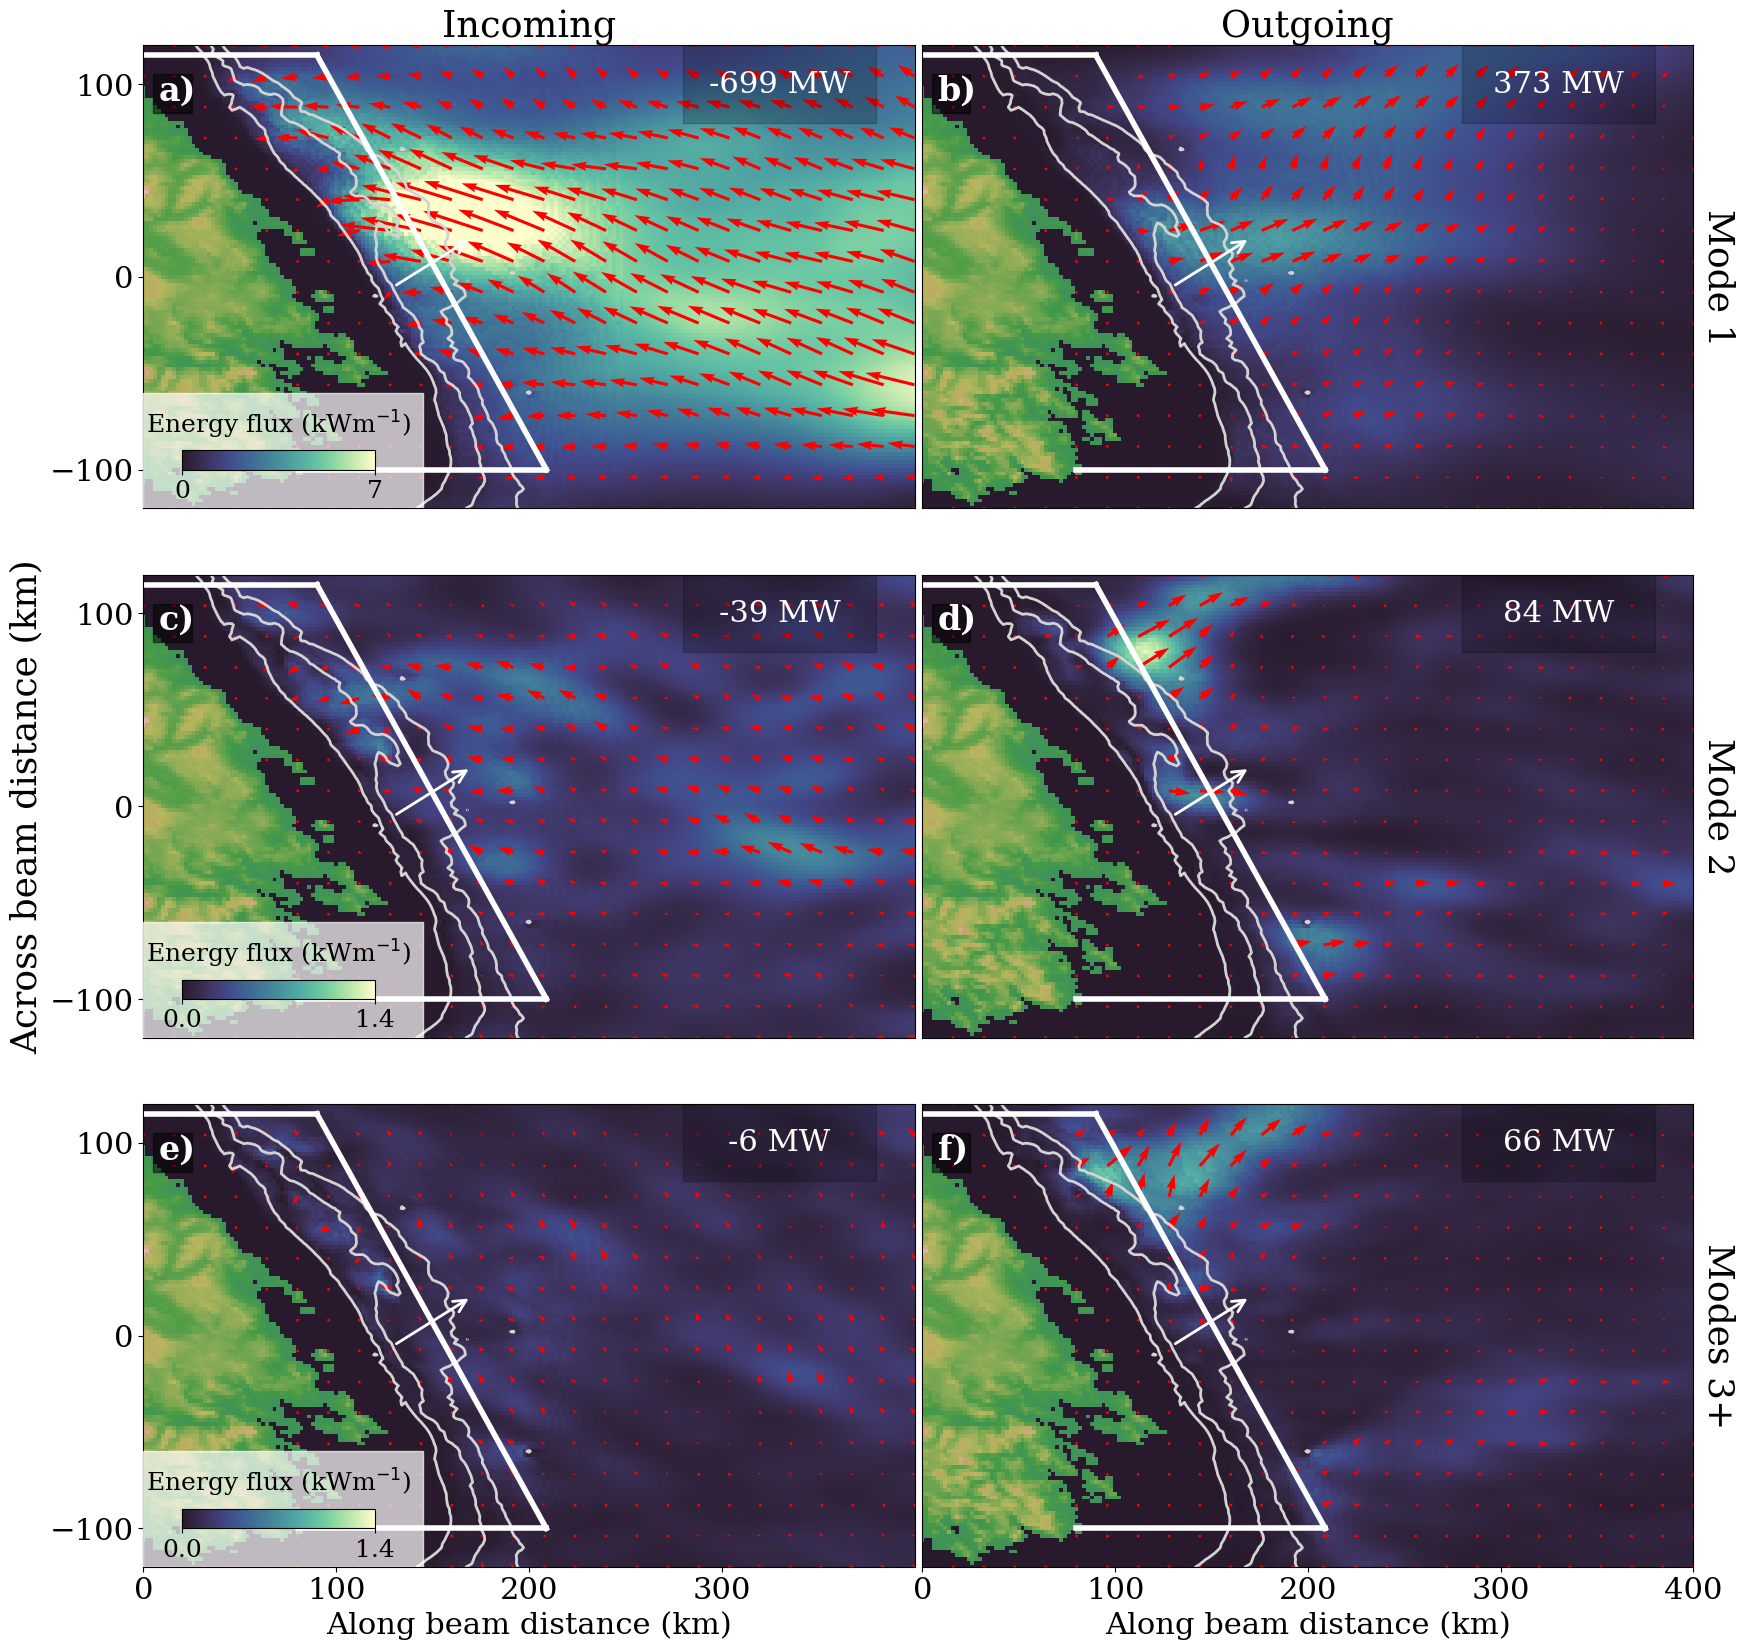

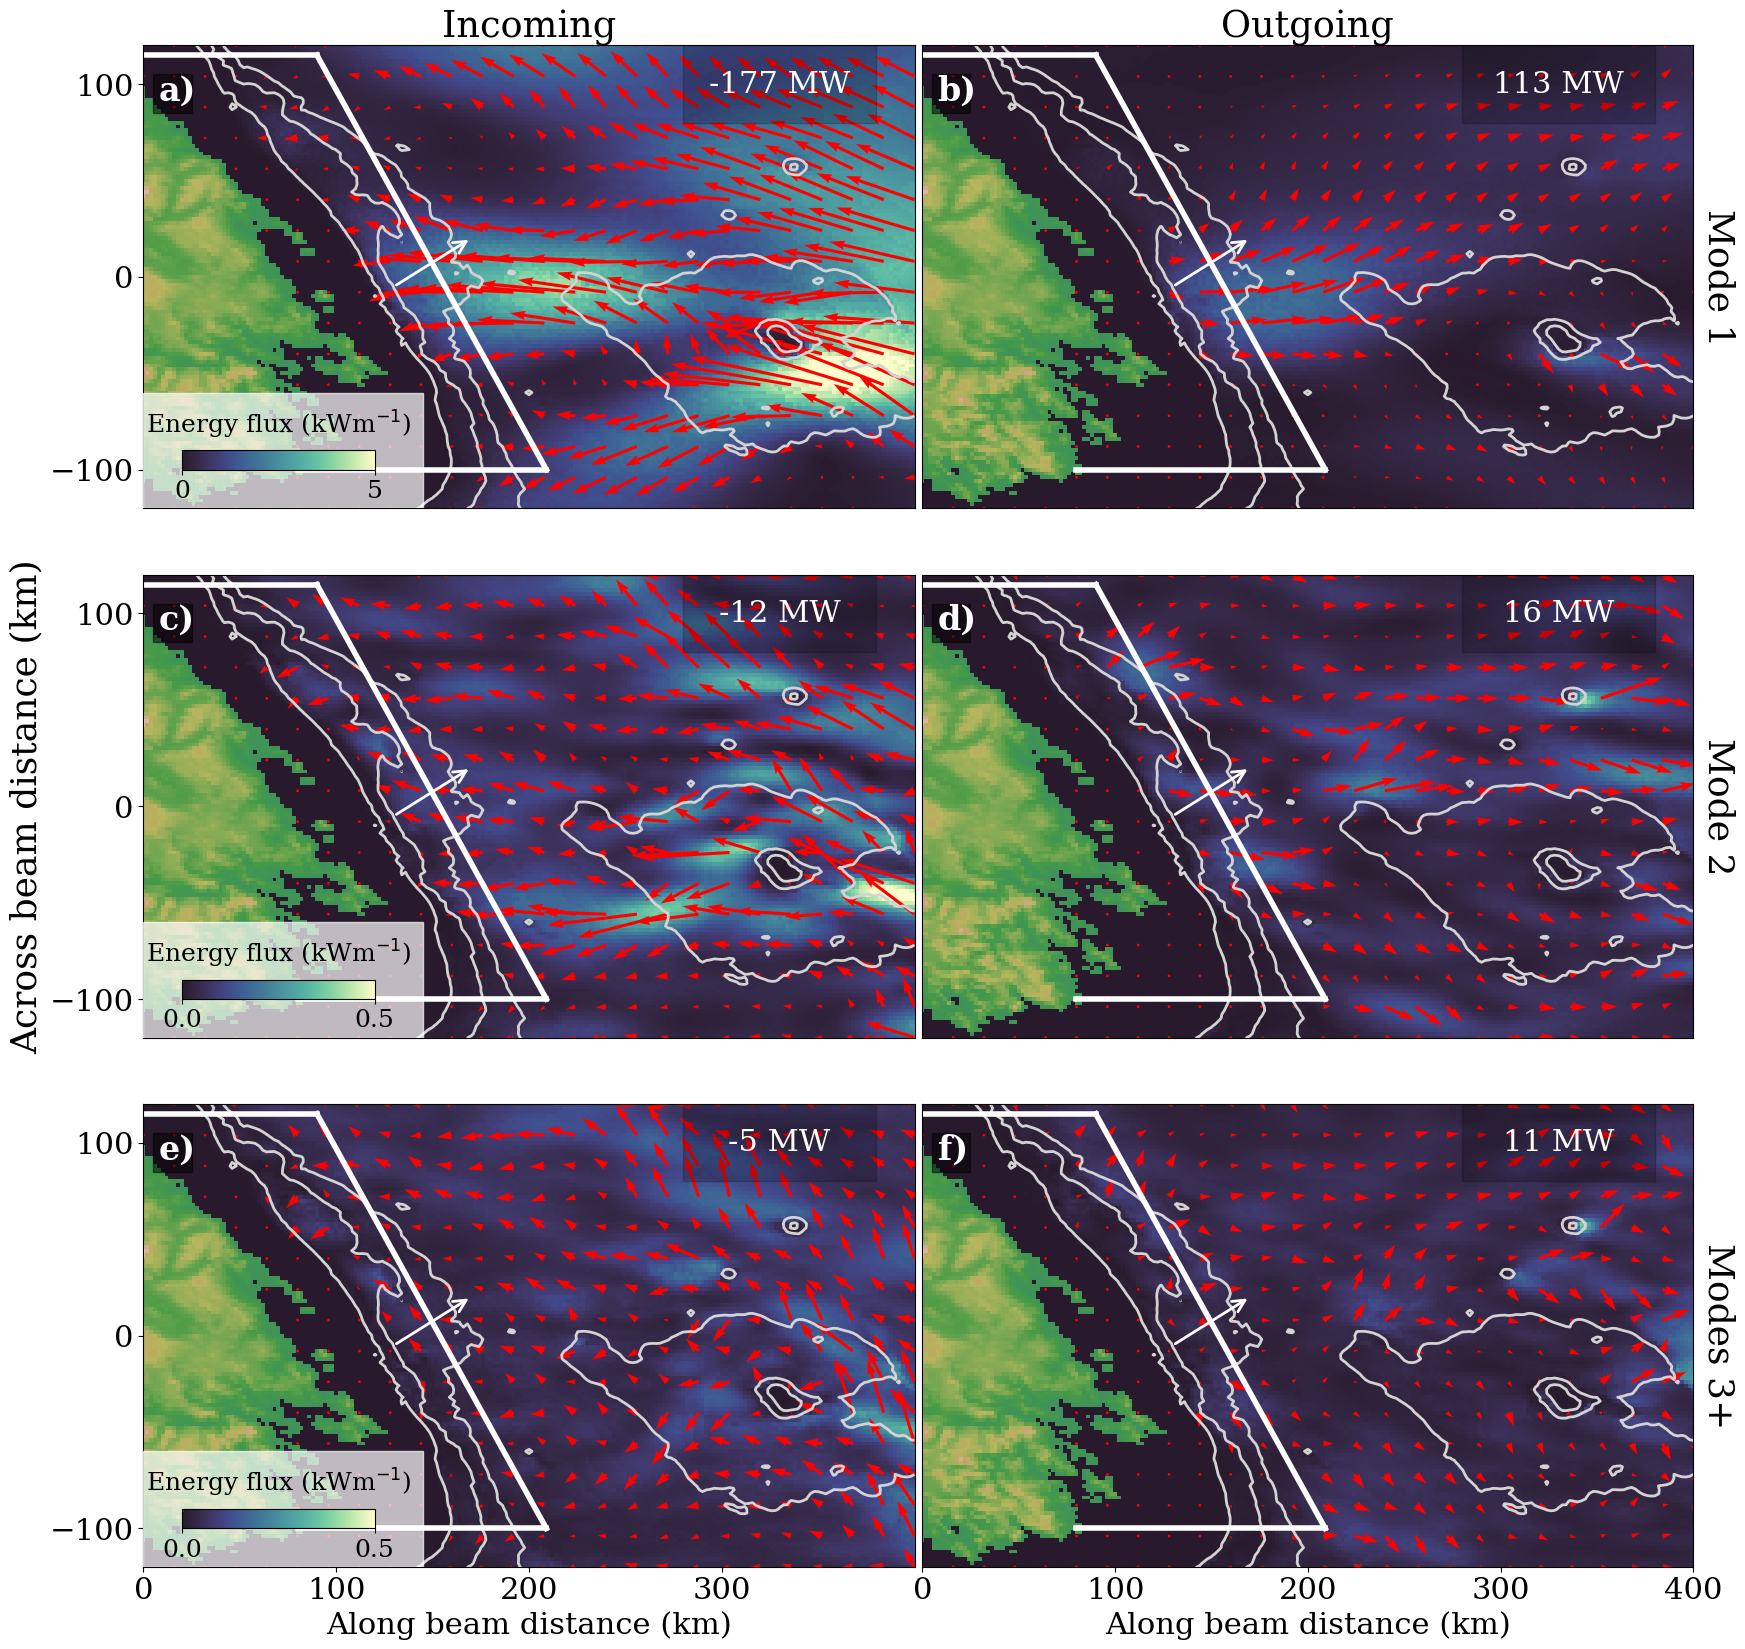

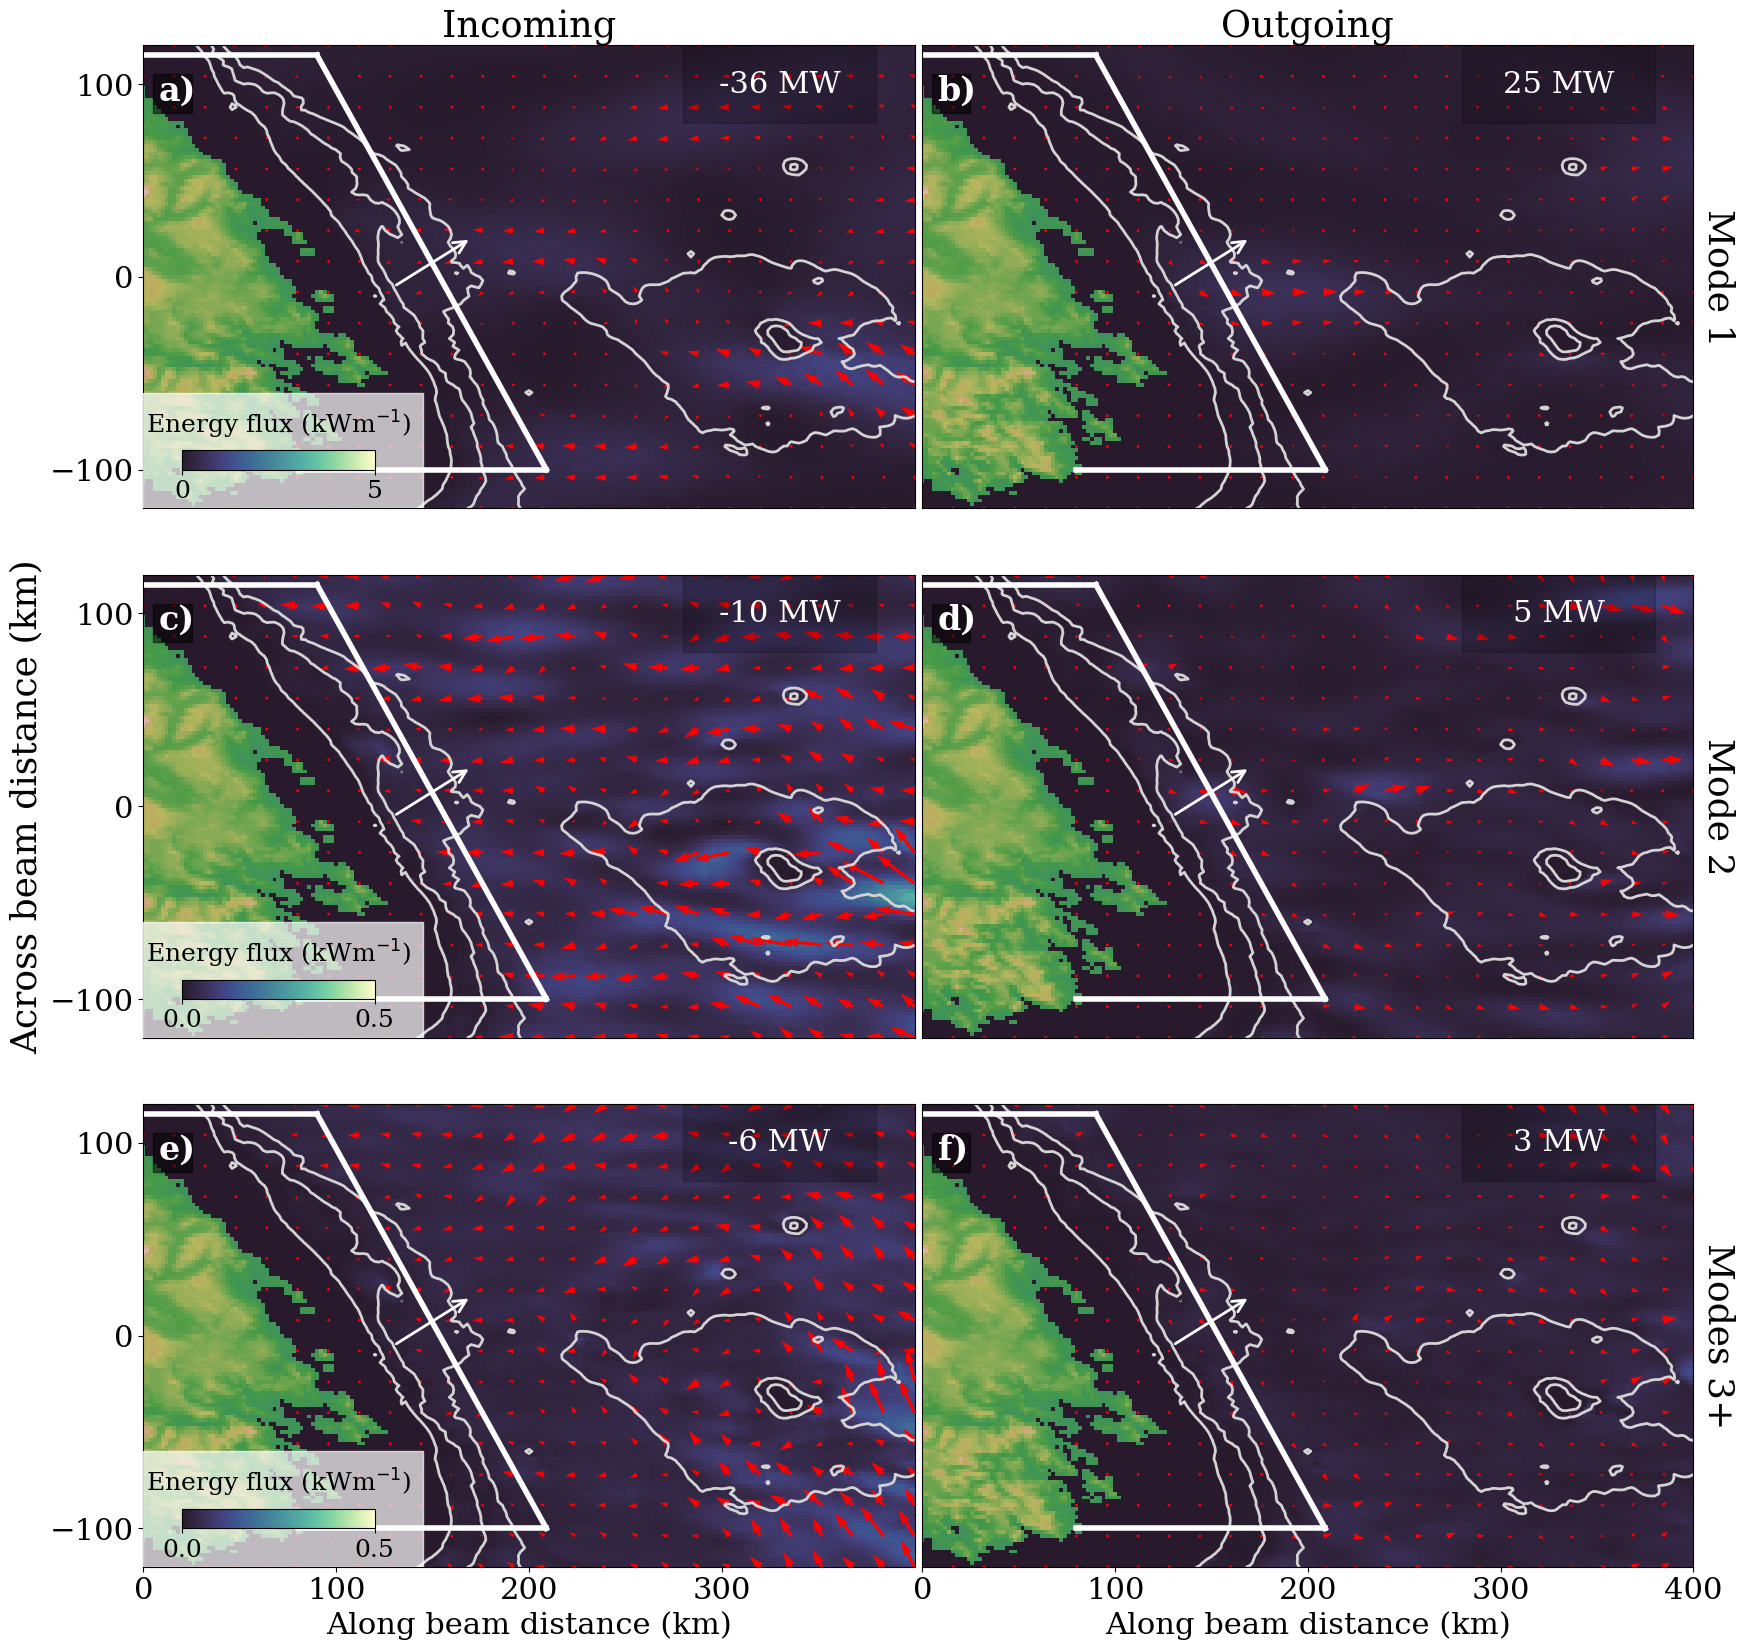

In [26]:

for expt in ["smooth-40","full-40","beamless-40"]:
    #!OLD LINE
    offset = 28
    xs_reflect, ys_reflect = [[90 + offset, 190 + offset],[190 + offset, 230 + offset]], [[110, -20],[-20, -110]]

    #! NEW LINE
    offset = 10
    xs_reflect, ys_reflect = [[80 + offset, 210 + offset]],[ [120, -120]]
    ymax = 100

    #! EXPERIMENTAL LINE
    xs_reflect, ys_reflect = [[90, 220 - 11]],[ [115, -100]]
    xs_north,ys_north = [[0,90]],[[115, 115]]
    xs_south,ys_south = [[80,220-11]],[[-100, -100]]

    xs = [xs_reflect[0],xs_north[0],xs_south[0]]
    ys = [ys_reflect[0],ys_north[0],ys_south[0]]
    signs = [1,1,-1]
    ## Plot an example domain to show area

    xmax = 400
    # fig,ax = plt.subplots(3,2,figsize=(20,20))
    fig = plt.figure(figsize = (20,20))
    gs = gridspec.GridSpec(3, 2, width_ratios=[1, 1], height_ratios=[1, 1, 1],hspace = 0.1,wspace = 0.01)

    ax = [fig.add_subplot(gs[i,j]) for i in range(3) for j in range(2)]
    ax = np.array(ax).reshape(3,2)

    
    toplot = data[expt]
    # toplot = data[expt].isel(time = 1)

    for a in ax.flatten():
        toplot.sel(xb = slice(0,xmax)).bathy.plot(vmax = 0, vmin = -4000, cmap = cmocean.cm.deep_r,ax = a,add_colorbar = False)
        toplot.sel(xb=slice(0, xmax)).bathy.plot.contour(levels=[-1000,-2000,-3000],ax = a,colors = ["lightgrey","lightgrey","lightgrey"],linestyles = "solid",linewidths = 2)

    # if expt == "beamless-40":
    #     toplot = data["full-40"] - data["beamless-40"]

    arrow_scales = {"smooth-40": 100000,"full-40": 30000,"beamless-40": 30000}
    mag_scales = {"smooth-40": 7000,"full-40": 5000,"beamless-40": 5000}
    mod_scales = {"smooth-40": [1,0.2,0.2],"full-40": [1,0.1,0.1],"beamless-40": [1,0.1,0.1]}

    mag_scale = 8000
    arrow_scale = 100000
    spacing = 8

    arrow_scale = arrow_scales[expt]
    mag_scale = mag_scales[expt]
    mod_scale = mod_scales[expt]


    plot_KE_quiver(toplot.isel(mode = 0).EF_alongbeam_forward,toplot.isel(mode = 0).EF_acrossbeam_forward,ax[0,0],xlim = slice(0,xmax),ylim = slice(None,None),arrow_scale = arrow_scale,mag_scale = mag_scale,spacing =8,xs = xs,ys = ys,signs = signs)
    plot_KE_quiver(toplot.isel(mode = 1).EF_alongbeam_forward,toplot.isel(mode = 1).EF_acrossbeam_forward,ax[1,0],xlim = slice(0,xmax),ylim = slice(None,None),arrow_scale = arrow_scale,mag_scale = mag_scale,spacing =8,mod_scale = mod_scale[1],xs = xs,ys = ys,signs = signs)
    plot_KE_quiver(toplot.isel(mode = slice(2,None)).EF_alongbeam_forward,toplot.isel(mode = slice(1,None)).EF_acrossbeam_forward,ax[2,0],xlim = slice(0,xmax),ylim = slice(None,None),arrow_scale = arrow_scale,mag_scale = mag_scale,spacing =8,mod_scale = mod_scale[2],xs = xs,ys = ys,signs = signs)
    plot_KE_quiver(toplot.isel(mode = 0).EF_alongbeam_backward,toplot.isel(mode = 0).EF_acrossbeam_backward,ax[0,1],xlim = slice(0,xmax),ylim = slice(None,None),arrow_scale = arrow_scale,mag_scale = mag_scale,spacing =8,xs = xs,ys = ys,signs = signs)
    plot_KE_quiver(toplot.isel(mode = 1).EF_alongbeam_backward,toplot.isel(mode = 1).EF_acrossbeam_backward,ax[1,1],xlim = slice(0,xmax),ylim = slice(None,None),arrow_scale = arrow_scale,mag_scale = mag_scale,spacing =8,mod_scale = mod_scale[1],xs = xs,ys = ys,signs = signs)
    plot_KE_quiver(toplot.isel(mode = slice(2,None)).EF_alongbeam_backward,toplot.isel(mode = slice(1,None)).EF_acrossbeam_backward,ax[2,1],xlim = slice(0,xmax),ylim = slice(None,None),arrow_scale = arrow_scale,mag_scale = mag_scale,spacing =8,mod_scale = mod_scale[2],xs = xs,ys = ys,signs = signs)


    for i,a in enumerate(ax.flatten()):
        for x,y in zip(xs_reflect,ys_reflect):
            a.plot([x[0],x[1]],[y[0],y[1]],color = "white",linewidth = 4)
        for x,y in zip(xs_north,ys_north):
            a.plot([x[0],x[1]],[y[0],y[1]],color = "white",linewidth = 4) # COMMENT TO REMOVE HORIZONTAL LINES
        for x,y in zip(xs_south,ys_south):
            a.plot([x[0],x[1]],[y[0],y[1]],color = "white",linewidth = 4) # COMMENT TO REMOVE HORIZONTAL LINES
        a.set_aspect('equal')
        a.set_xlabel("")
        a.set_ylabel("")
        a.set_title("")
        a.set_xticks([])
        a.set_yticks([])
        a.set_xlim(0,xmax)

    # Incoming: -183.1 -13.8 kW/m
    # Outgoing: 72.1 8.0 kW/m
    # Xterm: 21.5 -0.3 kW/m

    ax[0,0].set_title("Incoming")
    ax[0,1].set_title("Outgoing")
    ax[1,0].set_ylabel("Across beam distance (km)")
    ax[0,1].set_ylabel("Mode 1",rotation = 270,labelpad = 30)
    ax[1,1].set_ylabel("Mode 2",rotation = 270,labelpad = 30)
    ax[2,1].set_ylabel("Modes 3+",rotation = 270,labelpad = 30)
    for i in range(3):
        ax[i,1].yaxis.set_label_position("right")  # Set the label position to the rightax[i,1].tick_params(axis='y', labelsize=22)  # Set font size for y-axis labels
        ax[i,0].set_yticks([-100,0,100])
        ax[i,1].yaxis.label.set_size(26)  # Set font size for y-axis labels
        ax[i,0].yaxis.label.set_size(26)  # Set font size for y-axis labels

    ax[2,0].set_xlabel("Along beam distance (km)")
    ax[2,1].set_xlabel("Along beam distance (km)")
    ax[2,0].set_xticks([0,100,200,300])
    ax[2,1].set_xticks([0,100,200,300,400])

    umax = 1
    efmax = 1
    for i in range(3):
        scale = mag_scale * mod_scale[i] / 1000
        patch = ax[i,0].add_patch(matplotlib.patches.Rectangle((0, -120), 145, 60, color='white', alpha=0.7))
        cax1 = ax[i,0].inset_axes([20, -100, 100, 10],transform=ax[i,0].transData)  # Adjust size and location
        patch.set_zorder(9)
        cax1.set_zorder(10)  # Bring the patch to the front
        cbar = plt.colorbar(
            plt.cm.ScalarMappable(cmap=cmocean.cm.deep_r, norm=plt.Normalize(vmin=0, vmax=scale)),
            cax=cax1,
            orientation='horizontal',
            location="bottom",
            label=r"Energy flux (kWm$^{-1}$)",
        )
        cbar.ax.xaxis.set_label_coords(0.5, 3.2)  # Adjust the title position to be higher
        cbar.set_ticks([0,scale])
        cax1.tick_params(labelsize=18, color="black", labelcolor="black")  # Set font size and color for colorbar ticks
        cax1.xaxis.label.set_size(18)  # Set font size for colorbar label
        cax1.xaxis.label.set_color("black")  # Set label color to black

        efmax = 50
        umax = 0.2

    for j, a in enumerate(ax.flatten()):
        patch = a.add_patch(matplotlib.patches.Rectangle((5, 85), 20, 20, color='black', alpha=0.5))
        patch.set_zorder(11)
        a.text(8, 88, f"{chr(97+j)})", transform=a.transData, fontsize=24,color = "white", fontweight='bold', va='bottom', ha='left').set_zorder(12)
        a.annotate("",xy = (170,20), xytext = (130,-5),transform = a.transData,arrowprops=dict(arrowstyle="->", color="white", lw=2)).set_zorder(13)

# Fig10: Shelf flux comparison

In [29]:
offset = 0
xs = [[90 + offset, 220 + offset]] 
ys = [ [120, -120]]
pdata = {}
temp = {}


#! EXPERIMENTAL LINE

xs, ys = [[90, 220 - 11]],[ [115, -100]]
xs_north,ys_north = [[0,90]],[[115, 115]]
xs_south,ys_south = [[80,220-11]],[[-100, -100]]

for expt in ["full-10","beamless-10","smooth-10","beamless-20","smooth-20","full-20","full-40","beamless-40","smooth-40","full-80","beamless-80"]:
    pdata[expt] = {}
    for direction in ["","_forward","_backward"]:
        E = contour_integral(
            xs,
            ys,
            data[expt][f"EF_alongbeam{direction}"],
            data[expt][f"EF_acrossbeam{direction}"]
        ).energy
        E += contour_integral(
            xs_north,
            ys_north,
            data[expt][f"EF_alongbeam{direction}"],
            data[expt][f"EF_acrossbeam{direction}"]
        ).energy
        E -= contour_integral(
            xs_south,
            ys_south,
            data[expt][f"EF_alongbeam{direction}"],
            data[expt][f"EF_acrossbeam{direction}"]
        ).energy



        pdata[expt][f"EF{direction}_mean"] = E.mean("time")
        pdata[expt][f"EF{direction}_std"] = E.std("time")
        temp[expt] = E
for res in ["10","20","40","80"]:
    pdata[f"anom-{res}"] = {}
    for key in pdata["full-40"].keys():
        if key == "EF_std":
            pdata[f"anom-{res}"][key] = (temp[f"full-{res}"] - temp[f"beamless-{res}"]).std("time")
        else:
            pdata[f"anom-{res}"][key] = pdata[f"full-{res}"][key] - pdata[f"beamless-{res}"][key]

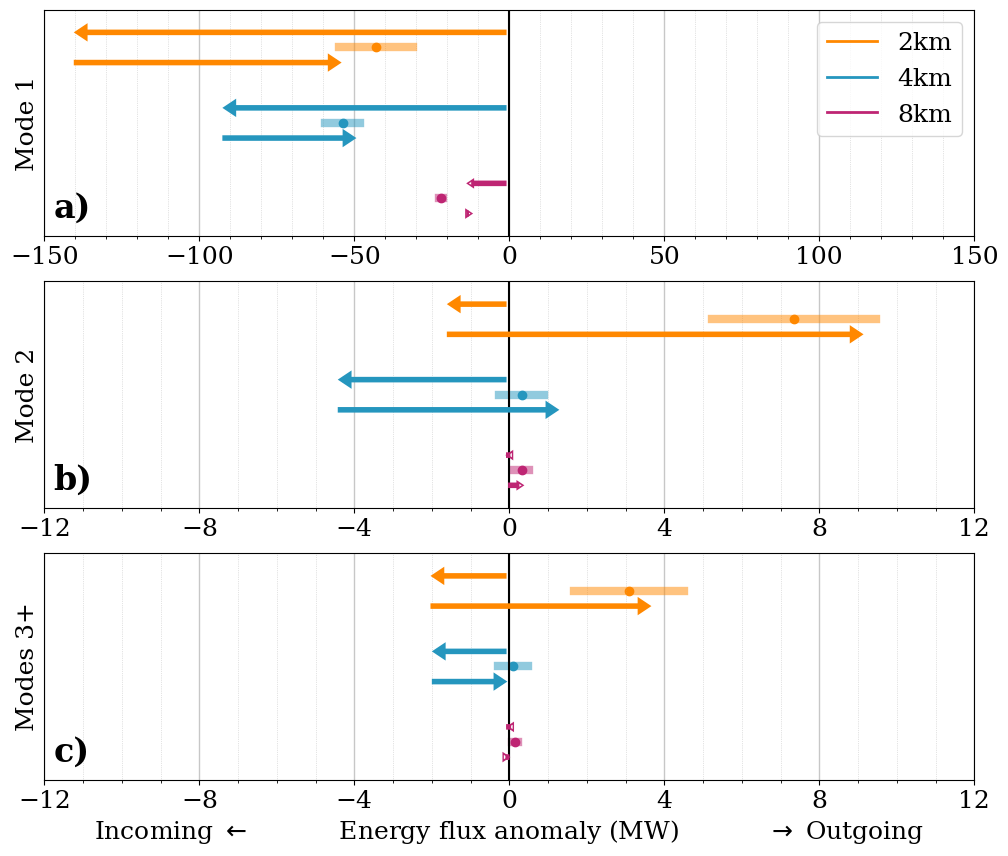

In [33]:
from matplotlib.lines import Line2D

font = {'family': 'serif', 'weight': 'normal', 'size': 18}
matplotlib.rc('font', **font)

def add_point(ax, ypoint=1, efmean=1, efin=1, efout=1, std=0, color="black", mode=[0]):
    efmean = efmean.isel(mode=mode).sum("mode").values * 1e-3
    efin = np.abs(efin).isel(mode=mode).sum("mode").values * 1e-3
    efout = np.abs(efout).isel(mode=mode).sum("mode").values * 1e-3
    std = std.isel(mode=mode).sum("mode").values * 1e-3
    vspace = 0.2
    ax.plot(np.array([efmean - std / 2, efmean + std / 2]), np.array([ypoint, ypoint]), color=color, lw=6, alpha=0.5)
    ax.scatter(efmean, ypoint, marker="o", color=color)
    hw = 0.16
    hl=0.24
    lw = 4
    if res == "10":
        hw /= 40
        hl /= 40
    ax.annotate("",
                xytext=(0, ypoint + vspace),
                xy=(-efin, ypoint + vspace),
                arrowprops=dict(arrowstyle=f"-|>,head_width={hw},head_length={hl}", color=color, lw=lw, capstyle='butt', joinstyle='miter'))
    ax.annotate("",
                xy=(efout - efin, ypoint - vspace),
                xytext=(-efin, ypoint - vspace),
                arrowprops=dict(arrowstyle=f"-|>,head_width={hw},head_length={hl}", color=color, lw=lw, capstyle='butt', joinstyle='miter'))
    return ax

# Plot only the right column, make it wider
fig, ax = plt.subplots(3, 1, figsize=(12, 10))  # Wider figure

colours = ['#be2573', '#2596be', '#ff8800', "#00bf7c"]

for i, res in enumerate(["10", "20", "40", "80"]):
    d = pdata[f"anom-{res}"]
    add_point(ax[0],
              ypoint=i,
              efmean=d["EF_mean"],
              efin=d["EF_forward_mean"],
              efout=d["EF_backward_mean"],
              std=d["EF_std"],
              color=colours[i],
              mode=[0])
    add_point(ax[1],
              ypoint=i,
              efmean=d["EF_mean"],
              efin=d["EF_forward_mean"],
              efout=d["EF_backward_mean"],
              std=d["EF_std"],
              color=colours[i],
              mode=[1])
    add_point(ax[2],
              ypoint=i,
              efmean=d["EF_mean"],
              efin=d["EF_forward_mean"],
              efout=d["EF_backward_mean"],
              std=d["EF_std"],
              color=colours[i],
              mode=slice(2, None))

for a in ax:
    a.minorticks_on()
    a.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)
    a.grid(which='major', linestyle='-', linewidth=1, alpha=0.7)
    a.set_ylim(-0.5, 3.5)
    a.set_ylim(-0.5, 2.5)
    a.set_yticks([])
    a.vlines(0, -20, 20, color="black")

ax[0].set_ylabel("Mode 1")
ax[1].set_ylabel("Mode 2")
ax[2].set_ylabel("Modes 3+")

ax[0].set_title("")
ax[0].set_xlim(-150, 150)
ax[1].set_xlim(-12, 12)
ax[2].set_xlim(-12, 12)


# ax[0].set_xlim(-0.015, 0.015)
# ax[1].set_xlim(-0.0015, 0.0015)
# ax[2].set_xlim(-0.0015, 0.0015)


xticks = np.array([-0.15, -0.1,-0.05, 0,0.05, 0.1, 0.15]) * 1000
xticks2 = np.array([-0.12,-0.08,-0.04, 0,0.04,0.08, 0.12]) * 100
# xticks2 = xticks * 0.1
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks2)
ax[2].set_xticks(xticks2)
ax[2].set_xlabel(r"Incoming $\leftarrow$           Energy flux anomaly (MW)           $\rightarrow$ Outgoing")

legend_elements = [
    Line2D([0], [0], color=colours[2], lw=2, label='2km'),
    Line2D([0], [0], color=colours[1], lw=2, label='4km'),
    Line2D([0], [0], color=colours[0], lw=2, label='8km'),
]
ax[0].legend(handles=legend_elements, loc='upper right')

for j, a in enumerate(ax.flatten()):

    a.text(0.01, 0.05, f"{chr(97+j)})", transform=a.transAxes, fontsize=24,color = "black", fontweight='bold', va='bottom', ha='left').set_zorder(12)
